# Detecting Depression through NLP and DL

1. Evelyn Peh Ting Yu
2. Koh Pei Ling
3. Lau Wei Ting
4. Song Yu Xiang
5. Jian Yi
6. Luqman Juzaili

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
stop=nltk.corpus.stopwords.words('english')

from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer

from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import defaultdict

from sklearn.metrics import classification_report

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.get_option('max_colwidth')
pd.set_option('max_colwidth', 500)

## 2. Import Datasets

In [3]:
df2 = pd.read_csv("Mental-Health-Twitter.csv")  #emoji datatset
df1 = pd.read_csv("sentiment_tweets3.csv")

In [4]:
df1.head()

Index                                                                                                                       message to examine  label (depression result)
0    106                                                                                just had a real good moment. i missssssssss him so much,                           0
1    217                                                                                               is reading manga  http://plurk.com/p/mzp1e                          0
2    220                                                     @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8                           0
3    288  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.                           0
4    540                                                                                            ADD ME ON MYSPACE!!!  myspace.com/LookThunder                          0

In [5]:
df1.rename(columns={'message to examine':"Message"},inplace=True)
df1.rename(columns={'label (depression result)':"Label"},inplace=True)

In [6]:
df1.columns

Index(['Index', 'Message', 'Label'], dtype='object')

In [7]:
df1.drop(["Index"],inplace=True,axis=1)

In [8]:
df1.head(100)
# df1.sample(10)

Message  Label
0                                                                                                                just had a real good moment. i missssssssss him so much,       0
1                                                                                                                               is reading manga  http://plurk.com/p/mzp1e      0
2                                                                                     @comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8       0
3                                  @lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.       0
4                                                                                                                            ADD ME ON MYSPACE!!!  myspace.com/LookThunder      0
5                                                                                                                                    so sleepy. good times tonight though       0
6                                                            @SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now       0
7                                                                                                                                       23 or 24ï¿½C possible today. Nice       0
8                                                                                                                              nite twitterville  workout in the am  -ciao      0
9                                                                                                                          @daNanner Night, darlin'!  Sweet dreams to you       0
10                                                                                                                                                Good morning everybody!       0
11                                     Finally! I just created my WordPress Blog. There's already a blog up on the Seattle Coffee Community  ... http://tinyurl.com/c5uufd      0
12                                                                                         kisha they cnt get over u til they get out frm under u just remember ur on top       0
13                                                                                          @nicolerichie Yes i remember that band, It was Awesome, Will you please reply       0
14                                                                                                                                  I really love reflections and shadows       0
15                                                                                                  @blueaero ooo it's fantasy?  i like fantasy novels   will check it out      0
16                                           @rokchic28 no probs, I sell nothing other than my blog http://snedwan.com  I'll have to get a listen to your band, on iTunes?      0
17                                                                                                    @shipovalov &quot;NOKLA connecting people&quot; ?? ???????  ???????       0
18                                                                              Once again stayed up to late and have to start too early  It is a good thing I like my job      0
19                                                                                           @Kal_Penn I just read about your new job, CONGRATULATIONS!  That's fantastic.      0
20                                                                                               haven't been able to sleep at ALL. i think i'll watch Ugly Betty online.       0
21                                                            woo thanks ron and steeve for following me yeow i have folowerssss  haha  p.s i wanna got to the ellen show       0
22                                                                   

In [9]:
df2.head(10)

Unnamed: 0             post_id                    post_created                                                                                                                                     post_text     user_id  followers  friends  favourites  statuses  retweets  label
0           0  637894677824413696  Sun Aug 30 07:48:37 +0000 2015  It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.  1013187241         84      211         251       837         0      1
1           1  637890384576778240  Sun Aug 30 07:31:33 +0000 2015                                               It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...  1013187241         84      211         251       837         1      1
2           2  637749345908051968  Sat Aug 29 22:11:07 +0000 2015                                                                              Awake but tired. I need to sleep but my brain has other ideas...  1013187241         84      211         251       837         0      1
3           3  637696421077123073  Sat Aug 29 18:40:49 +0000 2015  RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…  1013187241         84      211         251       837         2      1
4           4  637696327485366272  Sat Aug 29 18:40:26 +0000 2015         It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety  1013187241         84      211         251       837         1      1
5           5  637692793083817985  Sat Aug 29 18:26:24 +0000 2015                                                                                          Making packing lists is my new hobby... #movinghouse  1013187241         84      211         251       837         1      1
6           6  637691649943072772  Sat Aug 29 18:21:51 +0000 2015                                At what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouse  1013187241         84      211         251       837         1      1
7           7  637689418472652800  Sat Aug 29 18:12:59 +0000 2015                                                  Currently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...  1013187241         84      211         251       837         0      1
8           8  637687177946734592  Sat Aug 29 18:04:05 +0000 2015                                                                                     Can't be bothered to cook, take away on the way 😁👍🏼 #lazy  1013187241         84      211         251       837         0      1
9           9  637684866906255360  Sat Aug 29 17:54:54 +0000 2015                 RT @itventsnews: ITV releases promo video for the final series of Downton Abbey http://t.co/mC8Ive72zR http://t.co/CFBKrRvJIs  1013187241         84      211         251       837        41      1

In [10]:
df2.drop(columns=["Unnamed: 0", "post_id", "post_created","user_id",'followers', 'friends', 'favourites', 'statuses', 'retweets'], inplace=True)

In [11]:
df2.rename(columns={"post_text": "Message"}, inplace=True)
df2.rename(columns={"label": "Label"}, inplace=True)

In [12]:
df2.sample(10)

Message  Label
4606                                                                                                      @asukalangley thank but nicomaki is cuter      1
14600                                                RT @ShitPussiesSay: Bryson tiller tweets just like his parody accounts https://t.co/DaHuNqMK6h      0
9410                                                                                   I feel bad for Derek Fisher..and Knicks fans everywhere.....      1
18081   Sondra Barrera is now following me on Twitter! Thank you Sondra Barrera! Say hello anytime… https://t.co/2e9ezfSLKf https://t.co/kYIEb5r9OI      0
11374                               RT @monaslut: who's gonna tell him that holland said stydia was the ross/rachel of tw.. https://t.co/eqXnT7HEEy      0
10421                                                                                                             RT @thewalkgindead: Bellamy Blake      0
18153                                                                                                       User:Stellopsky https://t.co/83iCo1W6FS      0
3427                                                                                               I HATE MYSELF. *cuts, cuts, and cuts constantly*      1
13715                                                                                                      Oh crap! It's a trap! Aleph took damage.      0
5408   It is okay to love your boyfriend or girlfriend, but making their name with their birth date your wallpaper for your school computer just no      1

## 3. Merging Datasets (Without Text Pre-processing)

In [13]:
df_uncleaned = pd.concat([df1,df2])

In [14]:
df_uncleaned.shape

(30314, 2)

## 4. Check and Drop Duplicate

In [15]:
df_uncleaned.duplicated().sum()

543

In [16]:
df_uncleaned.drop_duplicates(inplace=True)

In [17]:
##Checking for null values
df_uncleaned.isnull().sum()

Message    0
Label      0
dtype: int64

In [18]:
df_uncleaned.columns

Index(['Message', 'Label'], dtype='object')

## 5. Exploratory Data Analysis
source: https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove

Findings about Target  Variable: 
> imbalance dataset with 59% non-depressive, 41% depressive

In [19]:
df_uncleaned.Label.value_counts(normalize = True)

0    0.590037
1    0.409963
Name: Label, dtype: float64

<AxesSubplot: xlabel='Label', ylabel='count'>

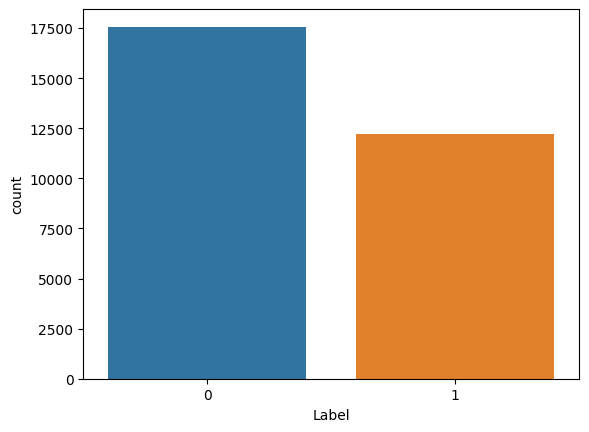

In [20]:
sns.countplot(x=df_uncleaned["Label"])

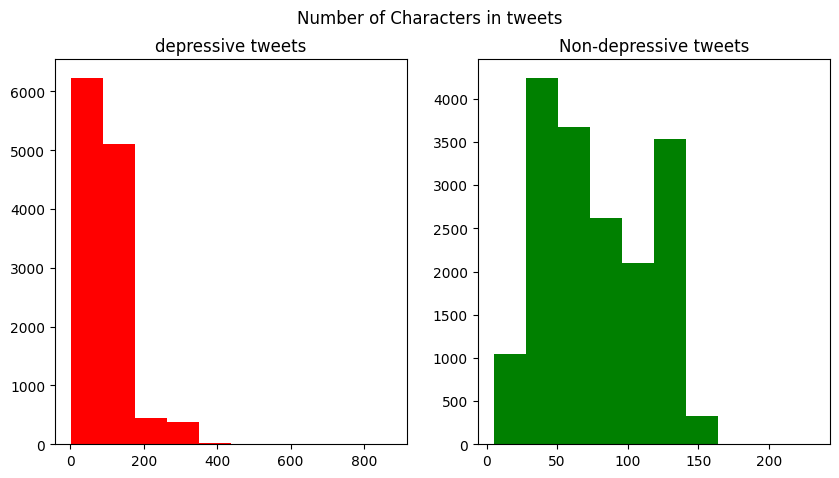

In [21]:
## Number of character

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Number of Characters in tweets')

#depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==1]['Message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('depressive tweets')

#non-depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==0]['Message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Non-depressive tweets')

plt.show()

##### Common stopwords in tweets

> In both of classes, "the", "to", "a" dominates 

In [22]:
def create_corpus(target):
    corpus=[]
    
    for x in df_uncleaned[df_uncleaned['Label']==target]['Message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

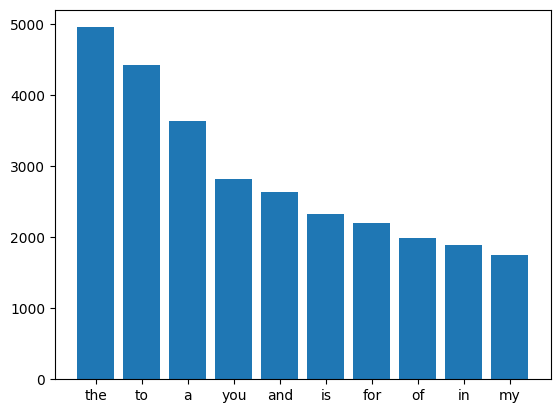

In [23]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

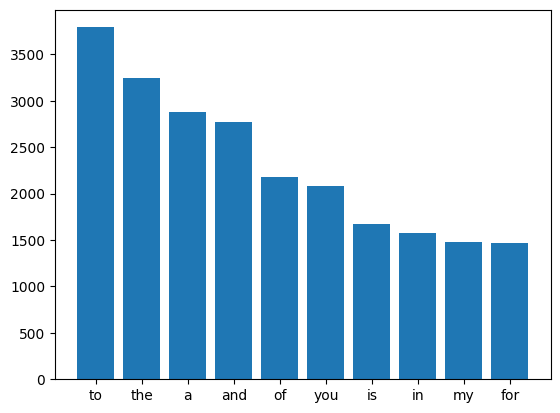

In [24]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

##### Number of Stop Words in a sentence on average 


In [25]:
# This will return us the percentage of Stop Words in Each Tweet. 

percentage_of_stop_word_in_each_tweet = []

def percentage_of_stop_word():
    for x in df_uncleaned['Message']:
        stop_word = 0.0
        total_word_per_sentence = 0.0
        for each_word in x.split(" "):
            if each_word in stop:
                stop_word += 1
            total_word_per_sentence += 1
        
        percentage_of_stop_word_in_each_tweet.append(stop_word/total_word_per_sentence)
    

percentage_of_stop_word()


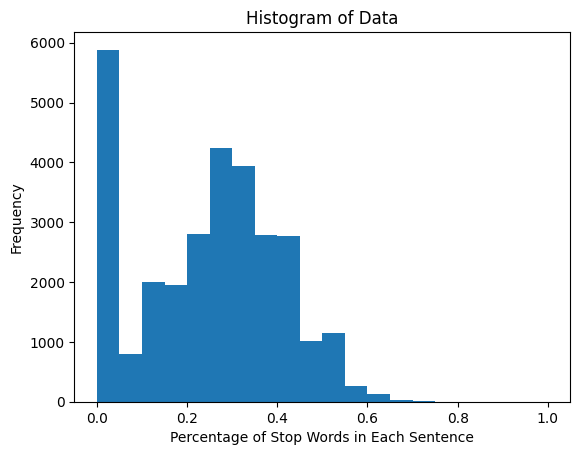

In [26]:
import matplotlib.pyplot as plt

data = percentage_of_stop_word_in_each_tweet

# Create a histogram with 0.05 bin width
bins = list(map(lambda x: x / 20, range(21)))
plt.hist(data, bins=bins)

# Add labels and title
plt.xlabel('Percentage of Stop Words in Each Sentence')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the histogram
plt.show()


##### Common punctuation in tweets

<BarContainer object of 25 artists>

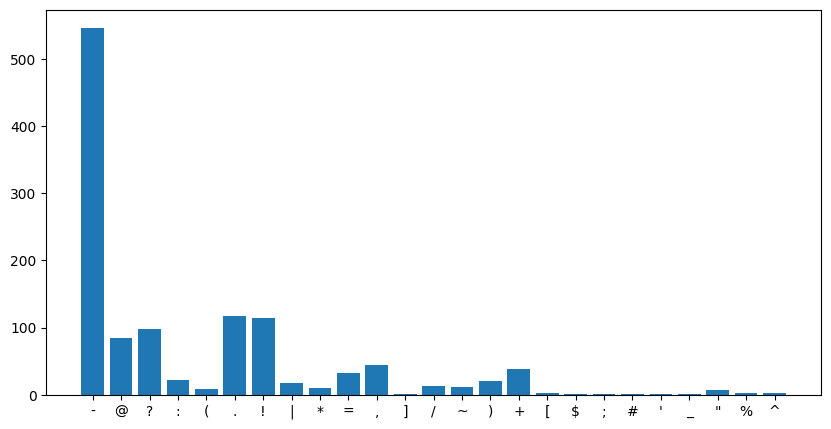

In [27]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 23 artists>

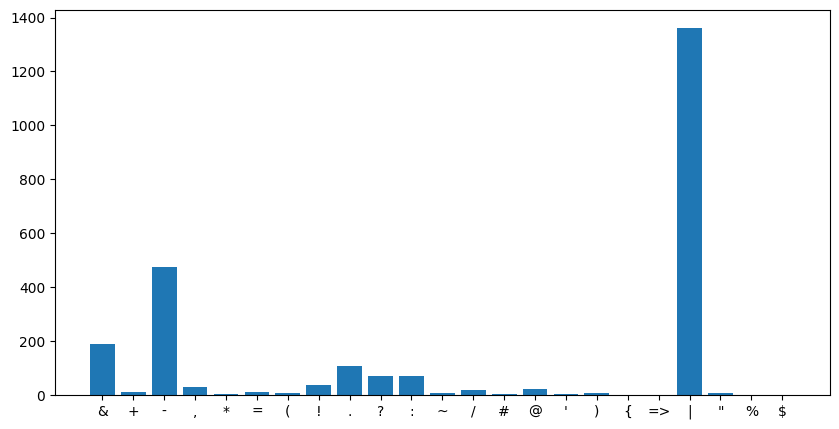

In [28]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

##### Common Words

In [29]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

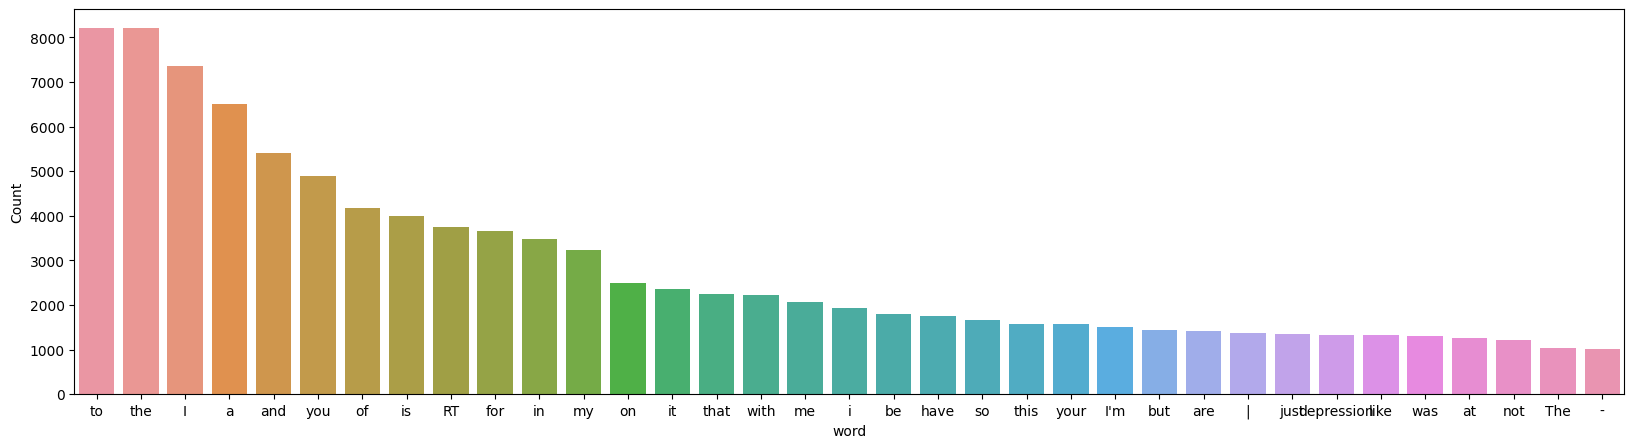

In [30]:
freq_words(df_uncleaned['Message'], 35)

#### Word Cloud

In [31]:
# python -m pip install wordcloud

In [32]:
from PIL import Image

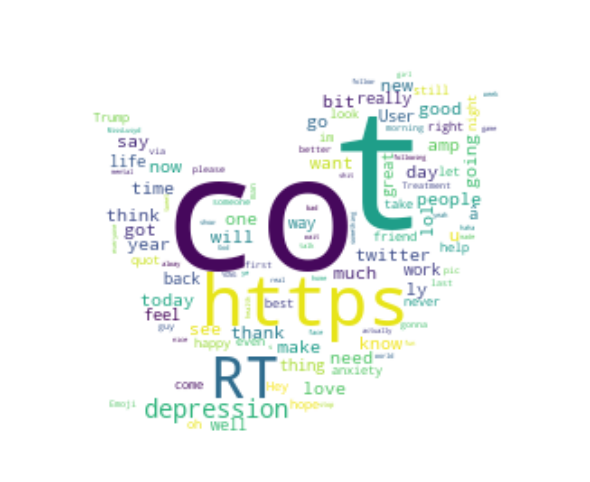

In [33]:
depressive_words = ' '.join(list(df_uncleaned['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

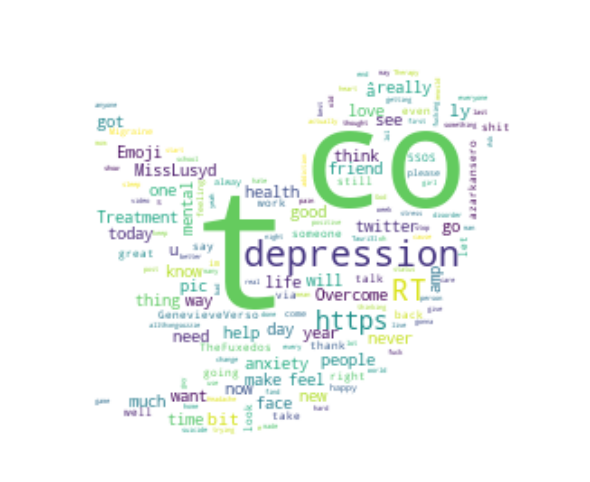

In [34]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 1]['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

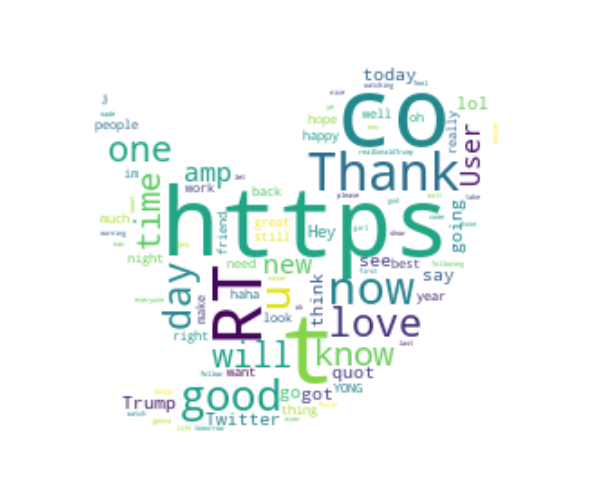

In [35]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 0]['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

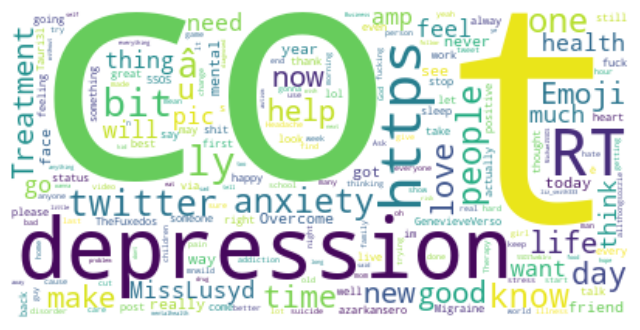

In [36]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 1]['Message']))
# mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

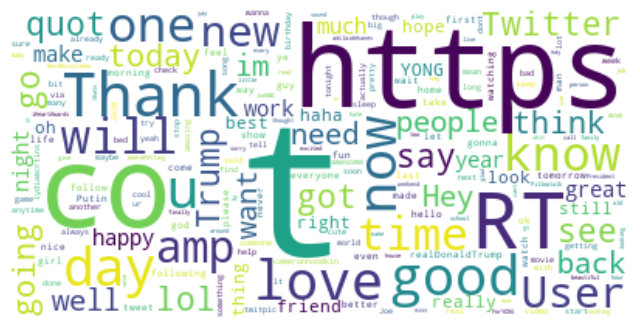

In [37]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 0]['Message']))
# mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Ngram Analysis

Bigram (n=2) analysis over the tweets to check the most common bigrams in tweets.

In [38]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot: >

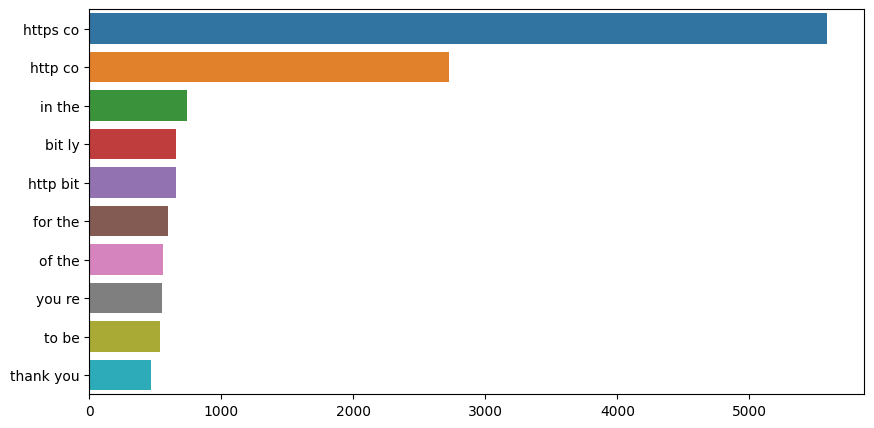

In [39]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(df_uncleaned['Message'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

> Hence the most frequent words are often unimportant words such as https which is an internet protocol and other words that does not echo much meaning for people identified with depression. Therefore, there is a need of thorough data cleaning 


## 5. Data Cleaning for the merged dataset 

https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression

In [40]:
df2.shape

(20000, 2)

In [41]:
## Remerge the data after dropping all RT in the 2nd data set -- substr = "RT @" 

df2 = df2[~df2.Message.str.contains("RT @")]
df_uncleaned = pd.concat([df1,df2])

In [42]:
df_uncleaned.shape

(26609, 2)

In [43]:
df2.head(100)

Message  Label
0    It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.      1
1                                                 It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...      1
2                                                                                Awake but tired. I need to sleep but my brain has other ideas...      1
4           It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety      1
5                                                                                            Making packing lists is my new hobby... #movinghouse      1
6                                  At what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouse      1
7                                                    Currently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...      1
8                                                                                       Can't be bothered to cook, take away on the way 😁👍🏼 #lazy      1
10                                                                                ... also, I have too much stuff. Way, way too much #movinghouse      1
11                                                   I never want to put one of these together again #lotharderthanitlooks http://t.co/70ujlTCKlB      1
12                                                                      Moving stuff is bloomin’ knackering... and there’s still loads to do... 😥      1
13                                                                             Back at the house, moving stuff. It’s so peaceful here... I ❤️ 🏡 😊      1
14                                                                                      Urgh. Anxiety. FFS where does it come from?! (Breathe...)      1
15                                                                          I have too much stuff. Way, way too much... Massive purge on the way.      1
16                                                    Hideous traffic on the A14. Must remember to pay closer attention to the traffic reports...      1
17                                                                                                            Packing and purging. Feels good 😊👍🏼      1
18                                                                                              In B&amp;Q looking at internal doors. Fun times 😉      1
19                                                                                 Time to get up. So many things to do, such a busy day ahead...      1
20                                                                    It's 6:20... do I get up or lie here a little longer with my cat buddy... ❓      1
21                                                                  There's nothing like cocktails and exhaustion to aid a good night's  sleep...      1
22                                           Great night out with my favourite ladies. Much needed after the past few days. I love them so much 💕      1
23                                                                            Sat down on the sofa for a quick rest... an hour ago. Need to move.      1
24                                                                                                         How much do I want pizza right now...?      1
25                                                             I will always love you.\r\n\r\nPeter Gabriel - In Your Eyes http://t.co/foAexmvoid      1
26                                                    Such a busy day ahead. I need to focus but I'm feeling on the edge of derailment right now.      1
27                                               Even now the smallest thing still makes my heart break. I doesn't feel like that ever goes away.      1
28     

### 5.1 Conversion to all Lower Case 

In [44]:
def text_to_lower(text):
    text = text.lower()
    return text

In [45]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:text_to_lower(x))

In [46]:
df_uncleaned.sample(50)

Message  Label
4579                                                                                                                                                                                                                                                                                                       in the theater to watch up!       0
16975                                                                                                                                                                                                                                                                           promises are just sweet lies\r\n\r\ntuesyong tilltheend      0
7605                                                                                                                                                                                                                                                                                                creating accounts all over the web       0
3688                                                                                                                                                                                                                                                                                      i can't get over the weather  i'm loving it!!      0
18872                                                                                                                                                                                       steven sutherland is now following me on twitter! thank you steven sutherland! say hello a… https://t.co/s4sbej7icy https://t.co/c981pbgyff      0
11227                                                                                                                                                                                                                                                                                                 @cameronhoodkin the allie effect™      0
1910                                                                                                                                                                                                                                                  defeating depression one step at a time | article teller | http://t.co/rypb2x3w2b      1
352                                                                                                                                                                                                                                                                                                             diggin mah new sweater       0
16693                                                                                                                                                                                                                                                                                                star wars rogue one was beautiful.      0
9980                                                                                                                                                                                                       •| l e t t i n g • g o |•\r\ni've held onto a lot for months. events i couldn't forgive myself for.… https://t.co/xnjxu5u7ds      1
7749                                                                                                                                                                                                                                                                   @envyamor awesome. july 5th. save the date  i'm so excited. xoxo      0
4874                                                                                                                                                                                                                      i have a sleep-deprived eeg in the morning tomorrow, so i have to stay up all nigh

### 5.2 Removal of HTML entities 

In [47]:
# These are the HTML Entities 
html_entities = {'&nbsp;': '', '&iexcl;': '', '&cent;': '', '&pound;': '', '&curren;': '', '&yen;': '', '&brvbar;': '', 
                  '&sect;': '', '&uml;': '', '&copy;': '', '&reg;': '', '&trade;': '', '&macr;': '', '&deg;': '', 
                  '&plusmn;': '', '&sup2;': '', '&sup3;': '', '&acute;': '', '&micro;': '', '&para;': '', '&middot;': '', 
                  '&cedil;': '', '&sup1;': '', '&ordm;': '', '&raquo;': '', '&frac14;': '', '&frac12;': '', '&frac34;': '', 
                  '&iquest;': '', '&Agrave;': '', '&Aacute;': '', '&Acirc;': '', '&Atilde;': '', '&Auml;': '', 
                  '&Aring;': '', '&AElig;': '', '&Ccedil;': '', '&Egrave;': '', '&Eacute;': '', '&Ecirc;': '', '&Euml;': '', 
                  '&Igrave;': '', '&Iacute;': '', '&Icirc;': '', '&Iuml;': '', '&ETH;': '', '&Ntilde;': '', '&Ograve;': '', 
                  '&Oacute;': '', '&Ocirc;': '', '&Otilde;': '', '&Ouml;': '', '&times;': '', '&Oslash;': '', 
                  '&Ugrave;': '', '&Uacute;': '', '&Ucirc;': '', '&Uuml;': '', '&Yacute;': '', '&THORN;': '', '&szlig;': '', 
                  '&agrave;': '', '&aacute;': '', '&acirc;': '', '&atilde;': '', '&auml;': '', '&aring;': '', '&aelig;': '', 
                  '&ccedil;': '', '&egrave;': '', '&eacute;': '', '&ecirc;': '', '&euml;': '', '&igrave;': '', '&iacute;': '', 
                  '&icirc;': '', '&iuml;': '', '&eth;': '', '&ntilde;': '', '&ograve;': '', '&oacute;': '', '&ocirc;': '', 
                  '&otilde;': '', '&ouml;': '', '&divide;': '','&amp;': '', '&lt;': '', '&gt;': '', '&quot;': '', '&apos;': ''}

In [48]:
html_re = re.compile('(%s)' % '|'.join(html_entities.keys()))

def replace_html_entities(text,contractions_dict=html_entities):
  def replace(match):
    return html_entities[match.group(0)]
  return html_re.sub(replace, text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:replace_html_entities(x))


In [49]:
df_uncleaned.sample(100)

Message  Label
2088                                                                                                                                                                                                            scientists grow human brains in lab | depression treatments | http://t.co/xfhbujqelc      1
5504                                                                                                                                                    @laiqalasse @veganrevoiution you can defend a human abuse victim while still believing they shouldn'tbe abusing animals.actually makes sense      1
9242                                                                                                                                                          ayy shots out to @superduperkyle his music gets me out of depression <emoji: sports medal><emoji: raised fist (medium dark skin tone)>      1
7030                                                                                                                                                                                             if a possible side effect of my headache medication is death should i risk it? http://bit.ly/3bgenp      1
19970                                                                                                                                                                jacquin's postulate on democratic government: no man's life, liberty, or property are safe while the legislature is in session.      0
7162                                                                                                                                                                                                                                                                           sadness fills my soul      1
12631                                                                                                                                                   @vickscan @msnbc @amjoyshow last straw!! greta, megan,joe no socks!!replace my view slot with a deplorable! phil yo… https://t.co/r25nu9ga7f      0
1116                                                                                                                                                                                                                                          @lo_ferrigno yes!! you ftw!!!!! lmao i wasnt watching       0
17724                                                                                                                                                    @badassmomwriter let's put a bunch of papers on a desk  pretend they're actual docs to prove something but you wouldn't let anyone look at!      0
8700                                                                                                                                                                                            why i fear the bad days in #depression #recovery  http://bit.ly/2bm7hyfâ  pic.twitter.com/amxo4eebne      1
8514                                                                                                           anyway cripple is a slur and if you're not physically disabled don't fucking use it! (yes, that includes all y'all saying crippling depression/other non physical illness/disability)      1
18054                                                                                                                                                                                                                                                        user:jeff113519 https://t.co/79u6cnnxsp      0
2459                                                                                                                                                         @wiseleo i'm glad to see you on twitter!!!  oh, and i definitely agreed with mary  mia when they declared you the winner of the battle!      0
9837                                                                                 

### 5.3 Removal of Hashtags

In [50]:
# Removal of HashTag
def remove_hashtags (text):
    text = re.sub(r"#\w+", '', text, flags=re.MULTILINE)
    return(text)


In [51]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_hashtags(x))

In [52]:
df_uncleaned.sample(100)

Message  Label
13143                                                                                             trump quotes putin in tweet slamming clinton, democrats  https://t.co/eubxqidycr  pin pals with putin................what, he's a murderer!      0
16765                                                                                                                                                         @dollahkhair *puts down knife*\r\n\r\nwell a simple "yes" would ve helped. tqvm      0
10649                                                                                                                                     i know sam did not ask for me to unleash my bellamy/bellarke meta on her in our texts but here i am      0
683                                                                                                                                                                                                do you lack the energy to get out of bed?       1
14230                                                                                                                                                                                                       @battlafield @okhan24 pretty much      0
19374                                                                                                                                                                 cell phone repair near me, north miami, florida https://t.co/50vqotr1fc      0
3173                                                                                                                                                                               @thetechnewsblog, my laptop!  second is my 1st gen touch..      0
1683                                                                                                          hereditary cholesterol disease ‘overlooked and untreated’ – huffington post uk | depression treatments | http://t.co/tagq2i58dq      1
5948                                                                                                                                                                                       first one awake...waiting to lay out on the beach       0
7135                                                                                                                                     the visual food encyclopedia: the definitive practical guide to food and cooking http://bit.ly/skgzk      1
10813                                                                                                                                      fly high allison argent\r\n ↳ semi ib/ac; morgs edits (vine by @stydiella) https://t.co/oojkga86km      0
17942                                                                                                                                        zayn is art.\r\n\r\nzayn for best video \r\n by @zaynmalik for  at the ! https://t.co/kwwns3spri      0
5037                                                                                                                                                                                      @dfizzy play ghostride the whip by family force 5.       0
4347                                                                                                                                 @kodazzle at least my current isn't still wearing a christmas hat, way to keep up with the times lachlan      1
13375                                                                                            @usafortrump2016 look at all the economic numbers 37%er ! you are so far wrong it's pathetic!!!! you're pathetic!!!! https://t.co/xsvizgszas      0
5562                                                                                                   @drippinglotus @melissabnesello @kevinthompsonn also. by eating animals you eat a lot more plants because the animals eat plants first      1
17617                                                            

### 5.4 Conversion of contractions

In [53]:
# Converting it to string type
df_uncleaned['Message'] = df_uncleaned['Message'].astype("str")
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26609 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  26609 non-null  object
 1   Label    26609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 623.6+ KB


In [54]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have",
                    
                    "aint": "are not","'s":" is","arent": "are not",
                     "cant": "cannot","cantve": "cannot have",
                     "'cause": "because","couldve": "could have","couldnt": "could not",
                     "couldntve": "could not have", "didnt": "did not","doesnt": "does not",
                     "dont": "do not","hadnt": "had not","hadnt've": "had not have",
                     "hasnt": "has not","havent": "have not","hed": "he would",
                     "hedve": "he would have","hell": "he will", "hellve": "he will have",
                     "howd": "how did","howdy": "how do you","howll": "how will",
                     "id": "i would", "id've": "i would have","ill": "i will",
                     "illve": "i will have","im": "i am","ive": "i have", "isnt": "is not",
                     "itd": "it would","itd've": "it would have","itll": "it will",
                     "itll've": "it will have", "lets": "let us","maam": "madam",
                     "maynt": "may not","mightve": "might have","mightnt": "might not", 
                     "mightntve": "might not have","mustve": "must have","mustnt": "must not",
                     "mustn'tve": "must not have", "neednt": "need not",
                     "needn'tve": "need not have","oclock": "of the clock","oughtnt": "ought not",
                     "oughtntve": "ought not have","shant": "shall not","shant": "shall not",
                     "shantve": "shall not have","shed": "she would","shedve": "she would have",
                     "shell": "she will", "shellve": "she will have","shouldve": "should have",
                     "shouldnt": "should not", "shouldntve": "should not have","sove": "so have",
                     "thatd": "that would","thatdve": "that would have", "thered": "there would",
                     "theredve": "there would have", "theyd": "they would",
                     "theydve": "they would have","theyll": "they will",
                     "theyllve": "they will have", "theyre": "they are","theyve": "they have",
                     "tove": "to have","wasnt": "was not","wed": "we would",
                     "wedve": "we would have","well": "we will","well've": "we will have",
                     "were": "we are","weve": "we have", "werent": "were not","whatll": "what will",
                     "whatllve": "what will have","whatre": "what are", "whatve": "what have",
                     "whenve": "when have","whered": "where did", "whereve": "where have",
                     "wholl": "who will","whollve": "who will have","whove": "who have",
                     "whyve": "why have","willve": "will have","wont": "will not",
                     "wontve": "will not have", "wouldve": "would have","wouldnt": "would not",
                     "wouldntve": "would not have","yall": "you all", "yalld": "you all would",
                     "yalldve": "you all would have","yallre": "you all are",
                     "yallve": "you all have", "youd": "you would","youdve": "you would have",
                     "youll": "you will","youllve": "you will have", "youre": "you are",
                     "youve": "you have"}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [55]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:expand_contractions(x))

In [56]:
df_uncleaned.sample(50)

Message  Label
1113                                                                                                                                                                         rule  when living a fit healthy lifestyle.. never miss a monday workout!! today i challenge you to… http://t.co/3arydlmxuh      1
18927                                                                                                                                                                                                                                                       lowery chiropractic https://t.co/lxuhf82qva      0
11900                                                                                                                                                                @realdonaldtrump  as long as trump is manipulated, russia and china wi will take our market share.  he thinks he knows everything.      0
3572                                                                                                                                                                                                                                             i love slapping my fresh ones and feeling it burrrrn 3      1
7123                                                                                                                                                                                                                                                                    headaches?? http://bit.ly/vd91x      1
6244                                                                                                                                                                                                                               http://twitpic.com/6rzlk - what i see when i walk out my front door       0
5350                                                                                                                                                                                                                              @nooneyouknow good morning adam  how is the world treating you today?      0
1227                                                                                                                                                      stuff packed! back to the airport with destination: ibiza!  yihaaaaa blue marlin,jockey club,pacha restaurant,ocean dri have hotel: be ready!      0
1616                                                                                                                                                                                                                                                      @mark_h wow! ok, i am feeling motivated now.       0
3445                                                                                                                                                                                              "i hope everyone doing this  shit knows they are getting into something they will never get out of. "      1
15682                                                                                                                                                                                                                @madreeve his pare nots got a divorce shortly after. i lost contact with the rest.      0
9612                                                                                                                                           harvard school of public health found that females who drink a mini amum of four cups of coffee per day could lower the risk of depression by up to 20%.      1
9854                                                                                                                                                                                                                             @f00d_nipple lmaooo join the club o_o \r\n"oh worddd? iight cool....."      1
1426                                          

### 5.5 Removal of URL

In [57]:
def remove_urls (text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return(text)

In [58]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_urls(x))

In [59]:
df_uncleaned.sample(50)

Message  Label
15357                                                                                                                                                                                    @ninsary *looks at profile picture*\r\n\r\nmmm yes cats tend to she would from ti ame to ti ame      0
4659                                                                                                                                                                                                                                                                                what      1
7161                                                                                                                                                                                                                   @yami_mami i thought i was the onli one up  cannot go to sleep...      0
1994                                                                                                                                                                                                                               @emity - not much - perhaps if it was a long weekend       0
17611                                                                                                                                       san diego should have been gave up the chargers.. i have been downtown multiple ti ames during chargers games and do not see fans in jerseys      0
9597   it may be true that i have 'utang nang loob' to them but my depression becaused by them is enough to pay it. the reason why i am so depressed because i work my ass off just for them to recognized our existence and pleased them but they sti will not see me and recognize me.      1
10279                                                                                                                                                                                                              more than 1 in 20 us children and teens have anxiety or depression         1
9878                                                                                                                                                                                                                                     what in the world ?¿ — watching game of thrones      1
5350                                                                                                                                                                                                               @nooneyouknow good morning adam  how is the world treating you today?      0
17928                                                                                                                                                                                                                                               zayn for best vi wouldeo \r\n\r\n         0
4110                                                                                                                                                                                                                     have you ever done some cosplay? — yep, all throughout school.       1
13466                                                                                                                   oh yes, my cri aminal record? the only thing i willegal i have done is absolutely ki willin it on the dancefloor. haha just ki wouldding! i have ki willed a man      0
12200                                                                                                                                                   63% exxon dri willing option world wi woulde in russia! us sanctions stopped all dri willing by exxon in russia in2011 none si…       0
14841                                                                                                                                                                                                                      @hananyxnyx the lina a

In [60]:
df_uncleaned.shape

(26609, 2)

### 5.6 Removal of Mentions/Retweets User Accounts 
- This does not remove the row itself. 

In [61]:
def remove_mentions_user (text):
    text = re.sub(r"@\w+", '', text, flags=re.MULTILINE)
    return(text)

In [62]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_mentions_user(x))

In [63]:
df_uncleaned.sample(50)

Message  Label
3082                                                                                                                                                                                            anita! hi there!  *hugs*      0
9493                                               update: finishe would the office yesterday and i am already on episode 10 of on my block, whoever sai would depression affects productivity is wrong i am doing great      1
8412                                                                                             my mom is birchin cuz i so love this band\r\ni really think its gotten so outta hand\r\nthey are kinda hot though.\r\n       1
17163                                                                                                                                                                                    do you get mad easily??\r\n\r\n      0
8608   kya meri tweets se ap ko depression hota hai only becoz i every ti ame share quran e pak ayat and hadees what u wanttell me openu can not change me i m musli ami was musli am& i wi will be musli amin sha allah      1
5467                                                                                                                                                                             share what ever they gi have u with me       0
1489                                                                                                                                                                        curtisdroppelman - sorry its late but hey!        0
18541                                                                                                                                                                                         sacramentohomegaragedoors       0
3941                                                                                                                                                 how much benis have you touche would in your life? — a good amount       1
106                                                                                                                                                                                       i love spontaneous road trips       0
889                                                                                                            finally home  out the rain; gloomy day out guess i will jus sit home  watch movies  eat popcorn all dayy       0
16055                                                                                                                                                                                        too dumb for portal. sorry.      0
19863                                                                                                              if only one could get that wonderful feeling of accomplishment without having to accomplish anything.      0
1476                                                                                                                                                best of luck to  against    at  today! three points apiece please!        1
10910                                                                bellamy + clarke \r\n- i could write an mla format essay on why i love them but \r\n- a1 development \r\n- canonically each other is weakness!!!!!!      0
2716                                                                                                                                                                               change addiction now steps of change       1
15110                                                                                                          are you ki wouldding me? you should read the bs some people say here. it triggers me too someti ames. lol      0
4651                                                                                                                                                                             

### 5.7 Removal of Punctuation

In [64]:
def remove_punctuations (text):
    text = re.sub(r"""[!"¦#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""", '', text, flags=re.MULTILINE)
    return(text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_punctuations(x))

In [65]:
df_uncleaned.sample(100)


Message  Label
7843                                                                                                                                                                                                                                               why is it always the wrestlers that want to fight me 😩      1
15789                                                                                                                                                                                                                                                                                              thanks      0
6648                                                                                                                                                                                                                                                             i had here at nator really cool showers       0
6813                                                                                                                                                                                                                                                         home remedies to get ri would of a headache       1
15425                                                                                                                                                                                                                                                                                   am i miss me too       0
1645                                                                                                                                                                                                                                                                            you are a freak man   lol      0
4648                                                                                                                                                                                                                                                      i am back and i have access to twitter again hi      1
14937                                                                                                                                                                          i got it wrong i got my own birthday date wrong qhsjabsiabdo what di would i enter when i first registered hyperventilates      0
3640                                                                                                                                                                                                                       we will do not ask if you do not care just telling you how our offense was out      1
18091                                                                                                                                                                                                                                                                       sagefrog marketing group llc       0
12742                                                                                                                                                                                           why is the  propagandist for trump joe scarborough spending most of his show this morning trying to cast       0
9244                                                                                            nobody with depression wants to be depressed and nobody just tunes out what others offer for help but it is so much harder for them to use the help from being in the state of mind that they are in   â      1
11821                                                                                                                                                                                                                                            flea flickers never fool anybody and almost never work        0
1513                

### 5.8 Removal of numbers

In [66]:
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('\d+', '')

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_2163/826882887.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('\d+', '')


In [67]:
df_uncleaned.sample(100)

Message  Label
16602                                                                                                                                                                                                           awww found it rest in peace buddy \r\n\r\n      0
6065                                                                                                                                                                                                            just had a dinner and wonderin what to do       0
4118                                                                                                                                           ughti ame to get ready for work  actually i pressed the snooze button a few ti ames but i guess i am awake       0
18672                                                                                                                                                                                  clickaway redwood city  verizon store phone repair computer repair       0
6407                                                                                                                                                    it was funny sookie laughe would too and bi will gave the best look it curled my toes  he is smexy      0
1698                                                                                                                                                                                                mmmm smells like homemade enchiladas and mexican rice       0
11985                                                                                                               did not tweet anything bad about  today even though he is a lying sack a shit who will probably get i ampeache would in his first year      0
1697                                                                                                                                                                       ‘cancer is a comma not a full stop’ – ti ames of india  depression treatments        1
1181                                                                                                                                                                                                                                morning motivation ❤️       1
2088                                                                                                                                                                                          scientists grow human brains in lab  depression treatments        1
17242                                                                                                                                                                                                 gi have yourself a break\r\n\r\nwearepayting foryong      0
7770                                                                                                                                                                                                                                           that is far      1
742                                                                                                                                                                        that is quite an endorsement i will have to request a key to his golden palace       0
10507                                                                                                                                                                                                             wait di would people likestep on you omg      0
13801                                                                                         oh yes my cri aminal record the only thing i willegal i have done is absolutely ki willin it on the dancefloor haha just ki wouldding i have ki willed a man      0
9091                                                                                                               

### 5.9 Emojis to textual description conversion

Translate emojis to their textual description. This is to ensure that the sentiment value that an emoji contain will also be considered by the model in future parts.
- Utilise TweetTokenizer to split tweets on a list of words, while treating the emoji as a word itself.
- Utilise Emoji demojize to convert the graphical representation of the emoji to its textual representation which seperated by underscore when the description is more than 1 word e.g., smiling_beaming_face, tears_of_joy

**CHOOSE ONE**
- Retained the text description as it is to differentiate that this phrase is conveyed as an emoji
- Combined the textual description of emojis e.g., "smiling_beaming_face" as "smilingbeamingface" so as to remove special characters that may cause complication in the model in future parts
- Seperate the textual description of emojis e.g, "smiling_beaming_face" as ['smiling','beaming','face'] to consider it as normal words

In [68]:
# pip install emoji-unicode
# pip install emoji --upgrade
# pip uninstall emoji
# pip install emoji==1.7

In [69]:
import emoji
from nltk.tokenize.casual import TweetTokenizer


#### Need to choose one method (How do we store emoji textual description)

In [70]:
## Start of Tweet Tokenizer

## Use Cases to think about
## smiling_cat_face_with_heart-eyes

from emoji import UNICODE_EMOJI

# helper function for convert_emojis; return true if token is an emoji
def is_emoji(s):
    return s in UNICODE_EMOJI

# Break up sentences into list of words while considering emojis
def store_emojis(text):
    
    # break up tweets into words while considering emojis as itself e.g., ['this','is','cool','😁','👍']
    tweet_list = TweetTokenizer().tokenize(text)
    tweet_string = convert_emojis(tweet_list)
    return tweet_string

# Convert emojis into text form
# Method 1: Underscore format - (Retain the actual representation as it is)
# def convert_emojis(text):
#     new_text = []
    
#     for i in range(len(text)):
#         if is_emoji(text[i]):
#             temp = emoji.demojize(text[i], delimiters=("",""))
#             new_text.append(temp)
#         else:
#             new_text.append(text[i])
    
    
#     return ' '.join([str(item) for item in new_text])

# Method 2: Combine together e.g., "red_face" becomes "redface"
# def convert_emojis(text):
#     new_text = []
    
#     for i in range(len(text)):
#         if is_emoji(text[i]):
#             temp = emoji.demojize(text[i], delimiters=("",""))
            
#             if "_" in temp:
#                 temp = temp.split("_")
#                 temp = "".join(temp)

#             new_text.append(temp)
#         else:
#             new_text.append(text[i])
        
#     return ' '.join([str(item) for item in new_text])

# Method 3: Seperate them as normal words e.g., "red_face" becomes ['red','face']
def convert_emojis(text):
    new_text = []
    
    for i in range(len(text)):
        if is_emoji(text[i]):
            temp = emoji.demojize(text[i], delimiters=("",""))
            
            if "_" in temp:
                temp = temp.split("_")
            
            for item in temp:
                new_text.append(item)
        else:
            new_text.append(text[i])
        
    return ' '.join([str(item) for item in new_text])



    

In [71]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:store_emojis(x))

In [72]:
df_uncleaned.sample(100)

Message  Label
2029                                                                                                                                                                                               hey kris where are you first headed for your tour please visit the philippines      0
5510                                                                                                                                                with her best mate very happy ti ame to start making plans for the weekend let us get the vodka out and have a good ti ame xx      0
282                                                                                                                                                                                            on the road to my wifes st triathlon if i do not update in hrs call the paramedics      0
10468                                                                                                                                                                                                                          wouldekanes this was in my drafts but hey thanks s      0
4736                                                                                                                                                                                                                                        is so relieved to have internet again      0
572                                                                                                                                                                                                                                                                  good morning      0
505                                                                                                                                                                                                                                                                haha thanks yo      0
2812                                                                                                                                                                                                                                      i cannot go to sleep so so so hyper lol      0
2383                                                                                                                                                                  overcome depression canada s olympians not exempt from depressi have disorders and stress even with success      1
9962                                                                                                                                                                                                                                         read your card again you can do this      1
11456                                                                                                                                                 i t looks better than s just from the trailer but then again i have extremely low expectations bc of last season agsjdhaksj      0
15085                                                                                                                                                                                                                                                    or a nonustazah girl hah      0
1569                                                                                                                                                                                                                                      lucky i am off thursday fri woulday tho      0
1372                                                                                                                                                                                                                                     notedilaria so happy too another for you      0
9193   rant i thinkpeople always ask me why i am al

### 5.10 Removal of StopWords 


In [73]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

print(stopWords)


{'over', 'your', "weren't", 'at', 'than', 'wouldn', "you'd", 'if', 'you', 'did', 'until', 'theirs', 've', 'themselves', 'now', 'itself', 'both', 'have', 'below', 'out', 'll', 'mustn', 'above', 'yours', "shouldn't", 'again', 'hers', 'a', 'each', "you've", 'couldn', "didn't", 'down', 'any', 'whom', 'yourself', "mightn't", 'some', 'with', 'am', "won't", 'this', 'what', 'she', 'same', 'is', 'shan', 'd', "shan't", 'who', "wasn't", "you're", 'up', 'very', 'here', 'because', 'those', "doesn't", 'doing', "couldn't", "it's", 'after', 'then', 'for', 'when', 'hadn', 'these', 'having', "mustn't", 'their', 'on', 'been', 'the', 'herself', 'ma', 'other', "she's", "hasn't", 'doesn', "needn't", "that'll", 'in', 'be', "you'll", 'has', 'shouldn', 'won', 'while', "haven't", 'once', 'don', 'm', 'mightn', 'most', 'yourselves', 'from', 'through', 'are', 're', "hadn't", 'that', 'i', 'few', 'ourselves', 'how', 'can', 'during', 'as', 'ours', 'nor', 'its', 'more', 'to', 'was', 'just', 'all', 'needn', 'should', "

In [74]:
from string import printable
st = set(printable)
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ''.join([" " if  i not in  st else i for i in x]))

In [75]:
import nltk 
def remove_stopwords(paragraph):
  words = nltk.word_tokenize(paragraph)
  wordlist_wo_stopwords=[]
  for w in words:
    if w not in stopWords:
        wordlist_wo_stopwords.append(w)
  print(wordlist_wo_stopwords)

  return wordlist_wo_stopwords

# data1['Message'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df_uncleaned['Message'] = df_uncleaned['Message'].astype(str)
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df_uncleaned['Message'] = df_uncleaned['Message'].apply(remove_stopwords)

['real', 'good', 'moment', 'missssssssss', 'hi', 'much']
['reading', 'manga']
[]
['need', 'send', 'em', 'accountant', 'tomorrow', 'oddly', 'even', 'referring', 'taxes', 'supporting', 'evi', 'wouldence', 'though']
['add', 'myspace', 'myspacecomlookthunder']
['sleepy', 'good', 'ti', 'ames', 'tonight', 'though']
['someone', 'already', 'sai', 'would', 'fiber', 'home', 'mean', 'wi', 'least', 'regular']
['c', 'possible', 'today', 'nice']
['nite', 'twittervi', 'wille', 'workout', 'ciao']
['night', 'darlin', 'sweet', 'dreams']
['good', 'morning', 'everybody']
['finally', 'created', 'wordpress', 'blog', 'already', 'blog', 'seattle', 'coffee', 'community']
['kisha', 'cnt', 'get', 'u', 'til', 'get', 'frm', 'u', 'remember', 'ur', 'top']
['yes', 'remember', 'band', 'awesome', 'wi', 'please', 'reply']
['really', 'love', 'reflections', 'shadows']
['ooo', 'fantasy', 'like', 'fantasy', 'novels', 'wi', 'check']
['probs', 'sell', 'nothing', 'blog', 'get', 'listen', 'band', 'itunes']
['nokla', 'connecting

['miss', 'gon', 'na', 'try', 'get', 'caught', 'jame', 'emails', 'hotel']
['beatles', 'red', 'album', 'think']
['get', 'chance', 'talk', 'hand', 'awesomest', 'weekend', 'miss', 'safe', 'love', 'u']
['start', 'virtua', 'tennis', 'training', 'top']
['morning']
['yah', 'right', 'popeye', 'also', 'sai', 'would', 'cartoons', 'heard', 'somewe', 'else', 'everyone', 'blessed', 'day']
['right', 'trying', 'convince', 'homegirl', 'thats', 'lounge', 'type', 'thing', 'happens', 'bowling']
['thx', 'yes', 'like', 'summers', 'nyc', 'born', 'july', 'def', 'fall', 'winter', 'person']
['ok', 'glad', 'worked']
['want', 'guys', 'know', 'davi', 'would', 'deluise', 'twitter', 'tv', 'dad', 'cool', 'cool', 'love', 'hi', 'guys']
['feeling', 'bad', 'made', 'cry', 'another', 'chance', 'gi', 'one', 'good', 'reason', 'follow']
['talented', 'amazing', 'person', 'may', 'god', 'bless', 'cause', 'deserve', 'hope', 'come', 'australia', 'jb']
['watch', 'ok', 'wants', 'make']
['wants', 'buy', 'lady', 'gaga', 'cd']
['wouldk

['good', 'morning', 'folks', 'today', 'call', 'nerdy', 'nerdason', 'super', 'excited', 'si', 'ams', 'coming']
['going', 'chi', 'willax', 'beach', 'sunshine', 'picnic', 'beer', 'combination']
['looking', 'forward']
['going', 'small', 'destinationy', 'vegas', 'tibetan', 'throat', 'singing', 'misha']
['always', 'great', 'help', 'friend', 'gooooinnnggg', 'beeeeeeeed']
['sitting', 'near', 'reception', 'waiting', 'inrerview', 'twittering', 'waiting', 'big', 'boss']
['real', 'account', 'fake', 'confused']
['become', 'habbit', 'consume', 'got', 'ta']
['havemsr', 'pare', 'nots', 'r', 'happy', 'rest', 'family', 'wondering', 'memy', 'folks', 'r', 'cool', 'left']
['problem']
['happy', 'birthday']
['good', 'morning', 'everyone', 'school', 'today']
['searching', 'ie', 'hp', 'nc', 'dri', 'havers', 'download', 'hpcom', 'results', 'first', 'page', 'thanx']
[]
['dude', 'follow', 'morning', 'way']
['ti', 'ame', 'orange', 'juicenice', 'thanx', 'god']
['ahh', 'know', 'gg', 'wi', 'soo', 'good', 'love', 'twi

['chocolate', 'taste']
['paha', 'fun', 'today', 'apart', 'feet', 'cold', 'hurt', 'cool']
['people', 'peg', 'leg', 'parrot', 'shoulder']
['curtis', 'jest', 'always', 'knows', 'say', 'comes', 'mysteries', 'love']
['deleted', 'bunch', 'people', 'myspace', 'feelin', 'accomplishe', 'would', 'rt', 'hahati', 'ame', 'eat', 'something']
['updates', 'websitelol']
['opinion', 'best', 'japanese', 'food', 'decent', 'price', 'springfield']
['bits', 'email', 'one', 'picked', 'thousands', 'entries', 'better', 'good']
['lady', 'asked', 'brad', 'got', 'purse', 'answe', 'ared', 'lol', 'hear', 'ask', 'funny']
['good', 'night', 'twitter', 'shopping', 'trip', 'possibly', 'tomorrow']
['ate', 'yummy', 'chocolate', 'bar', 'missing', 'baby', 'wait', 'ti', 'gets', 'home']
['swe', 'woulden', 'usual', 'tired', 'twitter']
['listening', 'bjork', 'yes']
['excellent', 'balloon', 'ani', 'amals', 'evil', 'anyway']
['awesome', 'background']
['indo', 'pras', 'festas', 'class', 'love']
['goodnight', 'twitland']
['recording

['always', 'try', 'spread', 'positivity', 'enough', 'twitter', 'emoji', 'frowning', 'face', 'let', 'know', 'need', 'anything', 'depression', 'anxiety', 'suici', 'wouldal', 'thoughts', 'attempts', 'curious', 'gendersexuality', 'best', 'help']
['pulitzer', 'prize', 'winner', 'talks', 'suici', 'wouldal', 'thoughts', 'music', 'therapy', 'via']
['kalenai', 'sorry', 'u', 'strokei', 'several', 'tias', 'without', 'lasting', 'disabilitiesthank', 'god', 'retired', 'rn', 'understand', 'close', 'n', 'life', 'threatening', 'eventsdo', 'gi', 'hope', 'gi', 'depression', 'cloud', 'ur', 'perceptionwish', 'u', 'best']
['yesssssssss', 'cure', 'depression', 'vi', 'wouldeo', 'pictwittercomuwwtuskv']
['shame', 'uncertare', 'noty', 'short', 'steps', 'away', 'depression', 'anxiety', 'separately', 'together', 'emotions', 'dri', 'brink', 'blot', 'everything', 'else', 'life', 'literally', 'make', 'crazy', 'lewis', 'howes']
['rt', 'treating', 'depression', 'functional', 'medicine', 'pictwittercomqfxundb']
['one',

['sucks']
['let', 'go']
['help', 'loved', 'ones', 'committed']
['possibly', 'combination', 'disorders']
['teens', 'smoking', 'less', 'pot']
['worrier']
['link', 'brain', 'size', 'iq']
['emotional', 'harmful']
['let', 'go', 'someone', 'treats', 'bad']
['help', 'quit', 'smoking']
['chronic', 'pain']
['support', 'groups', 'pare', 'nots', 'children']
['african', 'american', 'community']
['use', 'rise']
['disciplined']
['amprove', 'mental', 'health']
['spouse', 'survival', 'strategies', 'woulddw']
['self']
['know']
['options', 'violent', 'iowa']
['kept', 'getting', 'services']
['recognizing', 'signs']
['quality', 'service']
['finally', 'healed']
['know', 'pathological']
['ways', 'recharge', 'batteries', 'care']
['mental', 'willness']
['much', 'neat']
['breast']
['genes', 'unlock', 'potential', 'treatment', 'would']
['linked']
['pain']
['mental', 'willness', 'someti', 'ames', 'abused']
['pare', 'gui', 'woulde', 'mental', 'willness']
['mess', 'sti', 'get']
['think']
['counseling', 'helps']
['

['think', 'done', 'much', 'small', 'amounts', 'support', 'large', 'quantities', 'sti', 'makes', 'big', 'difference']
['thank', 'everyone', 'would', 'literally', 'without']
['say', 'happy', 'severe', 'understatement']
['every', 'single', 'person', 'talked', 'place', 'nice', 'understanding', 'perfect']
['going', 'cost', 'anything']
['safe', 'place', 'go', 'talk', 'lgbt', 'people', 'every', 'day', 'needwant']
['met', 'great', 'people', 'exceptionally', 'helpful', 'understanding']
['healthcare', 'endo', 'appointment', 'february', 'start', 'transitioning', 'march']
['heres', 'big', 'news']
['today', 'could', 'gone', 'better']
['go']
['gon', 'na', 'make', 'tell', 'tonight']
['appointment', 'went', 'superbly', 'one', 'place', 'go']
['course']
['omfg']
['willsshadow', 'appare', 'notly']
['pare', 'nots', 'literally', 'weebs', 'hi', 'woulding', 'powerlevel', 'ti', 'ame', 'di', 'would', 'notice']
['like', 'mom', 'realise', 'drew', 'like', 'yeah', 'one', 'boatgirls']
['draws', 'fucking', 'shi', 'a

['whispers', 'god', 'life', 'beyond', 'amaginings']
['case', 'presentations', 'plastic', 'surgery']
['symptoms', 'c', 'c', 'bulging', 'disc']
['depression', 'suici', 'woulde']
['bulging', 'disc', 'c', 'c', 'disc', 'cervical', 'spine', 'kind', 'specialist', 'go', 'see']
['managing', 'migraine', 'healthcare', 'professional', 'gui', 'woulde', 'collaborati', 'migraine', 'care']
['back', 'pain', 'understood', 'cuttingedge', 'approach', 'healing', 'back']
['mg', 'tramadol', 'effecti', 'dose', 'pound', 'beagle']
['get', 'ri', 'would', 'migraine', 'causes']
['dr', 'scholl', 'back', 'pain', 'relief', 'orthotics', 'men', 'sizes', 'pair']
['home', 'remedies', 'headaches']
['meniere', 'disease', 'ampact', 'life']
['pharmacotherapeutics', 'nurse', 'practitioner', 'prescribers']
['really', 'bad', 'headache', 'migraine', 'else', 'could']
['caldera', 'releaf', 'neck', 'rest']
['light', 'darkness', 'buried', 'ali', 'preparing', 'die', 'learning', 'li']
['causes', 'headaches', 'sleeping']
['get', 'ocula

['mutuals', 'wi', 'murder', 'mayb', 'e', 'probably']
['starting', 'reason', 'reaso', 'n', 'bisexual', 'thank', 'u']
['big', 'fan', 'threads', 'let', 'make', 'one', 'favorit', 'e', 'vines', 'willo']
['hey', 'th', 'e', 'fukc']
['amie', 'peep']
['ohhh', 'wow', 'wow']
['whatdoesitmeanmp']
['ams', 'whatever']
['shy', 'ufkck']
['oh', 'thank', 'god']
['also', 'oh', 'go']
['man', 'chris', 'life']
['like', 'glorify', 'politicians', 'really', 'gon', 'na', 'miss', 'obamas', 'wish', 'best', 'thanks', 'u', 'guys', 'done']
['ok', 'meet', 'u']
['right']
['also', 'sent', 'u', 'stuff', 'dms', 'ily']
['god', 'iconic']
['wouldekanes', 'fairytales', 'general', 'lore', 'also', 'athe', 'neverland', 'arc', 'best', 'season', 'thank', 'u']
['scrmeaingng', 'peter', 'pan', 'one', 'favorite', 'fairytales', 'loved', 'neverland', 'arc', 'wow', 'hyped']
['oh', 'god', 'wow']
['hinestly', 'shook']
['wouldekanes', 'wodkdj', 'actual', 'dad', 'di', 'would', 'fuvkfj']
['ed', 'created', 'stitchers', 'tech', 'woowwow']
['ki

['friend', 'geo', 'wallace']
['jeff', 'sessions', 'omits', 'decades', 'records', 'ag', 'confirmation', 'hearing', 'via']
['follow', 'money']
['leaked', 'snowden', 'document', 'hints', 'feds', 'certain', 'russia', 'hacked', 'us', 'election', 'via']
['rocknot', 'world', 'amwbqqozdw']
['netflix', 'crown', 'whitewashes', 'naziloving', 'royal', 'via', 'wouldailybeast', 'thought', 'russian', 'rule']
['rock', 'world']
['would', 'reagan', 'sai', 'wouldgovernment', 'problem', 'know', 'something', 'putin', 'trump', 'would']
['come', 'press', 'work', 'like', 'find', 'money', 'money', 'wi', 'trump', 'des']
['wouldailybeast', 'ailesheadthe', 'year', 'effort', 'create', 'platform', 'altright', 'succeededwith', 'help', 'rush']
['great', 'presi', 'wouldent', 'murdererious', 'presi', 'wouldent']
['suspects', 'foregone', 'conclusion', 'also', 'true', 'press', 'haterswi', 'try', 'destroy']
['help', 'numbers', 'wi', 'trumps', 'waterloo', 'amagine']
['sane', 'citizens', 'must', 'stand', 'come', 'let', 'guy

['amori', 'aku', 'ada', 'je', 'si', 'ampan', 'selfies', 'ane', 'mostly', 'blackmail', 'purposes', 'lah']
['btw', 'dah', 'survey', 'babi', 'yang', 'nak', 'want', 'one', 'called', 'captain', 'cooker', 'big', 'fluffy', 'took', 'p']
['ugh', 'fine']
['amori', 'tengok', 'lah', 'got', 'handsome', 'boys', 'playing', 'like', 'baby']
['amori', 'um', 'willo']
['steam', 'sale', 'dah', 'start', 'ke']
['family', 'nothing', 'ever', 'taken', 'seriously', 'yes', 'ok', 'haha']
['choose', 'believe', 'want', 'family', 'never', 'conventional', 'type', 'ahahahah']
['pigs', 'cute']
['taken', 'photo', 'pare', 'nots', 'years', 'hehu']
['mom', 'need', 'dog', 'mom', 'raising', 'one', 'years', 'ni', 'pun', 'tengah', 'menyalak', 'sekarang', 'ni', 'minta', 'belikan', 'anjing']
['man', 'going', 'heaven']
['tweeted', 'pic', 'public', 'people', 'sitting', 'behind', 'much', 'like', 'remaining', 'jedis', 'starwars', 'rebel']
['stri', 'manly']
['wait', 'misread', 'tang', 'mana', 'nya', 'dia', 'look', 'japanese']
['yes']


['american', 'eagle', 'auto', 'glass']
['injury', 'lawyer', 'brampton']
['ray', 'blom', 'plumbing', 'inc']
['quickly', 'know', 'mining', 'equipment']
['california', 'college', 'san', 'diego', 'national', 'city']
['silas', 'truck', 'lines', 'llc']
['north', 'point', 'mechanical', 'llc']
['renaissance', 'family', 'health', 'care']
['renaissance', 'family', 'health', 'care']
['ashleys', 'pastry', 'shop']
['ashleys', 'pastry', 'shop']
['scottsdale', 'dentist']
['window', 'sunscreens', 'phoenix']
['deckporchpatio']
['deckporchpatio', 'wouldsh']
['userrandallcrater']
['mount', 'dora', 'dryer', 'vent', 'cleaning']
['userpetitcaloundra']
['roofinglongview']
['mount', 'dora', 'dryer', 'vent', 'cleaning']
['mount', 'dora', 'dryer', 'vent', 'cleaning']
['roperinsuranceservices']
['roperinsuranceservices']
['usergotawatch']
['usereasybuyoutlet', 'us']
['useratlantagaragedoorspecialists']
['skinovate', 'skin', 'care', 'clinic']
['userduraclean']
['userduraclean']
['seo', 'houston', 'company']
['use

In [76]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ' '.join(x))

In [77]:
df_uncleaned.sample(100)

Message  Label
7425                                                                                                                                                             jerry sweet chi amy changas lmao      0
5361                                                                                                                                                                          happy birthday love      1
1169                                                                                                                                insanity max cardio challenge team beachbody supergym join go      1
7557                                                                                                                                                      makes smile honestly clue either people      0
6955                                                                                                                         suici woulde mental health bi polar depression near death experience      1
9431                                                                                                                                             one days ama straighten hawk jus see wat happens      1
13803                                                                                                                                          aleph tried backflips oh pulled perfectly hot damn      0
18643                                                                                                                                                                        north shore plumbing      0
15591                                                                                                                                                               attaboy shazwan sooner better      0
14715                                                                                                                           internet even seen stores springfield also supes excited watch ob      0
8524                                                           went hospital today hiv checkup good meds sti working really pleased missed single dose refusing take ages good back virus control      1
1765                                                                                                                                                                                unknown title      1
7274                                                                                                                                                             ah mondays start great week hope      0
10354                                                                                                                                                                                   yes watch      0
5128                                                                                                                                            best part alzhei amers planning ur surprise party      0
9621                                                                                                                                                               anxiety sucks depression sucks      1
7008                                                                                                                                                        think cute mormon boysjust two though      0
10224                                                                                                                                  almost years drowned depression finally found back old new      1
13635                                                                                                                                                              oh crap trap aleph took damage      0
4465                                                                                                                                                     favorite vi w

### 5.11 Tokenisation 

Remove Stop words first then tokenise
- What is tokenization? In essence, it’s splitting a string into smaller units (tokens) 

- After tokenizing the sentence we are provided with a list of all words (and signs) within the sentence. Another common method is sentence tokenization, which splits the text into a list of sentences --> i think maybe no need 

https://www.dataquest.io/blog/how-to-clean-and-prepare-your-data-for-analysis/

In [78]:
# import nltk
# nltk.download('punkt')

In [79]:
from nltk.tokenize import word_tokenize
df_uncleaned['Tokenised'] = df_uncleaned['Message'].apply(word_tokenize)

In [80]:
df_uncleaned.sample(100)

Message  Label                                                                                                                                                                                                                 Tokenised
17816                                                                                                               accomplish things need home either cuz usually tired accomplishing things work      0                                                                                                                                [accomplish, things, need, home, either, cuz, usually, tired, accomplishing, things, work]
504                                                                                                                                                                                      child sex      1                                                                                                                                                                                                              [child, sex]
4312                                                                                                                                                                                        steven      1                                                                                                                                                                                                                  [steven]
4823                                                                                                                                                                                        others      0                                                                                                                                                                                                                  [others]
153                                                                                                                                                                                   pipe calling      0                                                                                                                                                                                                           [pipe, calling]
14851                                                                                                                                              moment see porn account sharing pictures friend      0                                                                                                                                                                   [moment, see, porn, account, sharing, pictures, friend]
1842                                                                                                                                                                              cute dog ya look      0                                                                                                                                                                                                     [cute, dog, ya, look]
2861                                                                                                                                                                          malum moments fucked      1                                                                                                                                                                                                  [malum, moments, fucked]
16627                                                                                                                                                               compli aments skin colour haha      0                                                                                                                                                                                      [compli, aments, skin, c

 ### 5.12 Lemmatization

Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, stemming the word 'Caring' would return 'Car'

In [81]:
#nltk.download('averaged_perceptron_tagger')

In [82]:
# nltk.download('averaged_perceptron_tagger')

# import nltk
# nltk.download('all')

In [83]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()

def lemmatize_it(text):
    empty = []
    for word, tag in pos_tag(word_tokenize(text)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
            empty.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, wntag)
            empty.append(lemma)
    return ' '.join(empty)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lemmatize_it)

In [84]:
df_uncleaned.sample(50)

Message  Label                                                                                                                                                                            Tokenised
2376                                                                             amen pastor thats truethe fulfi willment come know stretche would potential      0                                                                                          [amen, pastor, thats, truethe, fulfi, willment, comes, knowing, stretche, would, potential]
2377                                                                                     overcome depression winter season blue way enhance mood plus energy      1                                                                                                     [overcome, depression, winter, season, blues, ways, enhance, mood, plus, energy]
15961                                                                                                                           want adi already drown pussy      0                                                                                                                                              [want, adi, already, drowning, pussies]
1267                                                                                                    tee hee luff btw next ti ame school musketeres thing      0                                                                                                                      [tee, hee, luff, btw, next, ti, ame, school, musketeres, thing]
13213                                                                      manchurian presi wouldent trump list russia among department defense priority via      0                                                                                      [manchurian, presi, wouldent, trump, list, russia, among, department, defense, priorities, via]
761                                                                                                      man crazy connect world create take step back freak      0                                                                                                                    [man, crazy, connected, world, creating, take, step, back, freak]
10817                                                                                                         try fine message could press good vine approve      0                                                                                                                        [trying, fine, messages, could, pressed, good, vine, approve]
300                                                                                                             umm arrangement would earliest day could get      0                                                                                                                                 [umm, arrangement, would, earliest, day, could, get]
15920                                                                                                             start price around rm make heavy duty duel      0                                                                                                                            [starting, price, around, rm, made, heavy, duty, dueling]
6905                                                                                                                     soo fuck sexxyyy bettter without us      0                                                                                                                                        [soo, fucking, sexxyyy, bettter, without, us]
3890                                                                                                                                     get bb bac function      0                                                                                                                                                             [got, bb, bac, function]
19080    

 ### 6 Further EDA (after cleaning)

> Getting the most popular words for the whole dataset

In [85]:
from collections import Counter

# function for checking popular words:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned['Message'])

Common_words  count
0    depression   2965
1         would   2140
2          like   1353
3          good   1042
4           ame    995
5            ti    994
6           get    976
7          love    954
8           one    932
9          know    902
10           wi    855
11          day    819
12           go    723
13       people    691
14          got    659
15          see    616
16            u    597
17        today    596
18          new    594
19          lol    577

**Insights**: We are able to observe the top 20 most common words in the dataset. This will provide us with insights of what words are more significant than the others in detecting depression. More specifically, we will be interested to know how many of these words are from depressed labelled tweets.

> Getting the most popular words for the whole dataset for depressed labelled tweets

In [86]:
df_uncleaned.shape

(26609, 3)

In [87]:
df_uncleaned_depressed = df_uncleaned[df_uncleaned["Label"] == 1] 
df_uncleaned_depressed.shape

(10495, 3)

In [88]:
from collections import Counter

# function for checking popular words in depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_depressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_depressed['Message'])

Common_words  count
0    depression   2961
1         would    843
2          like    619
3           get    450
4        people    398
5            ti    386
6           one    386
7          know    374
8       anxiety    364
9           ame    337
10         love    298
11         life    287
12           go    284
13           wi    273
14   treatments    272
15         good    264
16          day    260
17         help    255
18          got    252
19       really    247

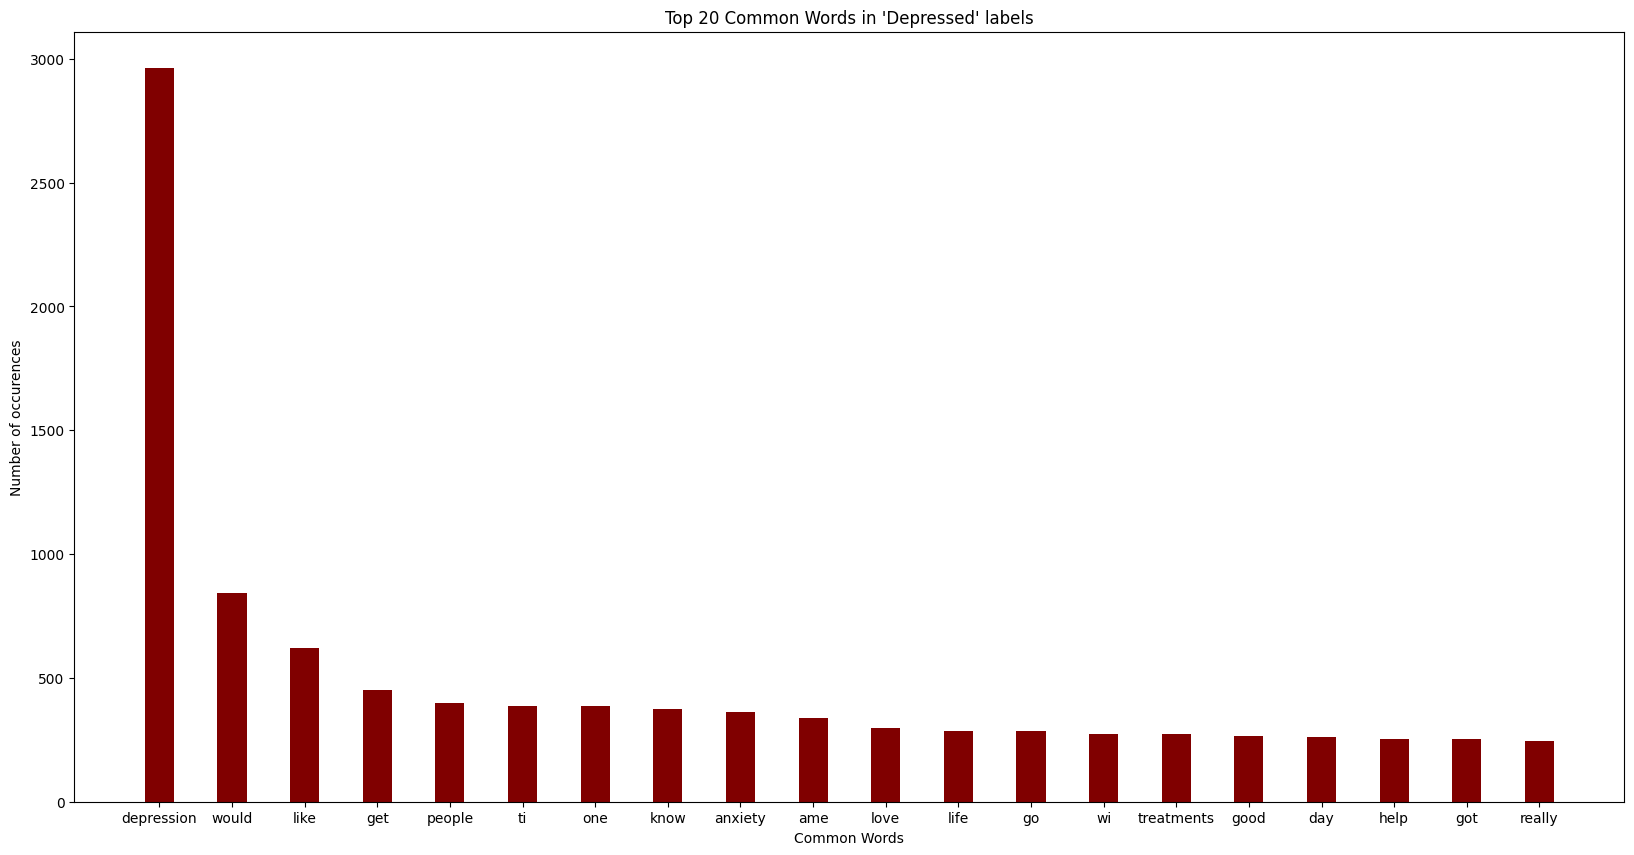

In [89]:
## Visualise in Bar Graph (Popular Words in depressed label)
import matplotlib.pyplot as plt

depressed_words_df = popular_words(df_uncleaned_depressed['Message'])
# depressed_words_df = temp_df.groupby('Common_words').sum().sort_values(by='count',ascending=False)

depressed_words_df
# courses = list(depressed_words_df.keys())
# values = list(depressed_words_df.values())

common_words_list = []
count_list = []

for index, row in depressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Depressed' labels")
plt.show()


**Insights**: After taking a deeper look at only depressed labelled tweets, we are able to notice extra words such as "treatments" and "help" to name a few. We are able to also observe that there are many words that are common in the whole dataset also appear for the most common words of depressed labelled tweets. However, some of these words may also appear in non depressed label tweets. Therefore, further filtering can be done to find out the most common words that strictly only appear for depressed labelled tweets to ensure only words representative of the label is extracted.

> Getting the most popular words for the whole dataset for non-depressed labelled tweets

In [90]:
# Find Common Words in non-depressed labels (To see if they are overlaps)
df_uncleaned_nondepressed =df_uncleaned[df_uncleaned["Label"] == 0] 
df_uncleaned_nondepressed.shape

(16114, 3)

In [91]:
from collections import Counter

# function for checking popular words in non-depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_nondepressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_nondepressed['Message'])

Common_words  count
0         would   1297
1          good    778
2          like    734
3           ame    658
4          love    656
5            ti    608
6            wi    582
7           day    559
8           one    546
9          know    528
10          get    526
11       thanks    495
12        thank    463
13            u    454
14          lol    444
15           go    439
16      twitter    435
17          see    416
18          got    407
19          new    380

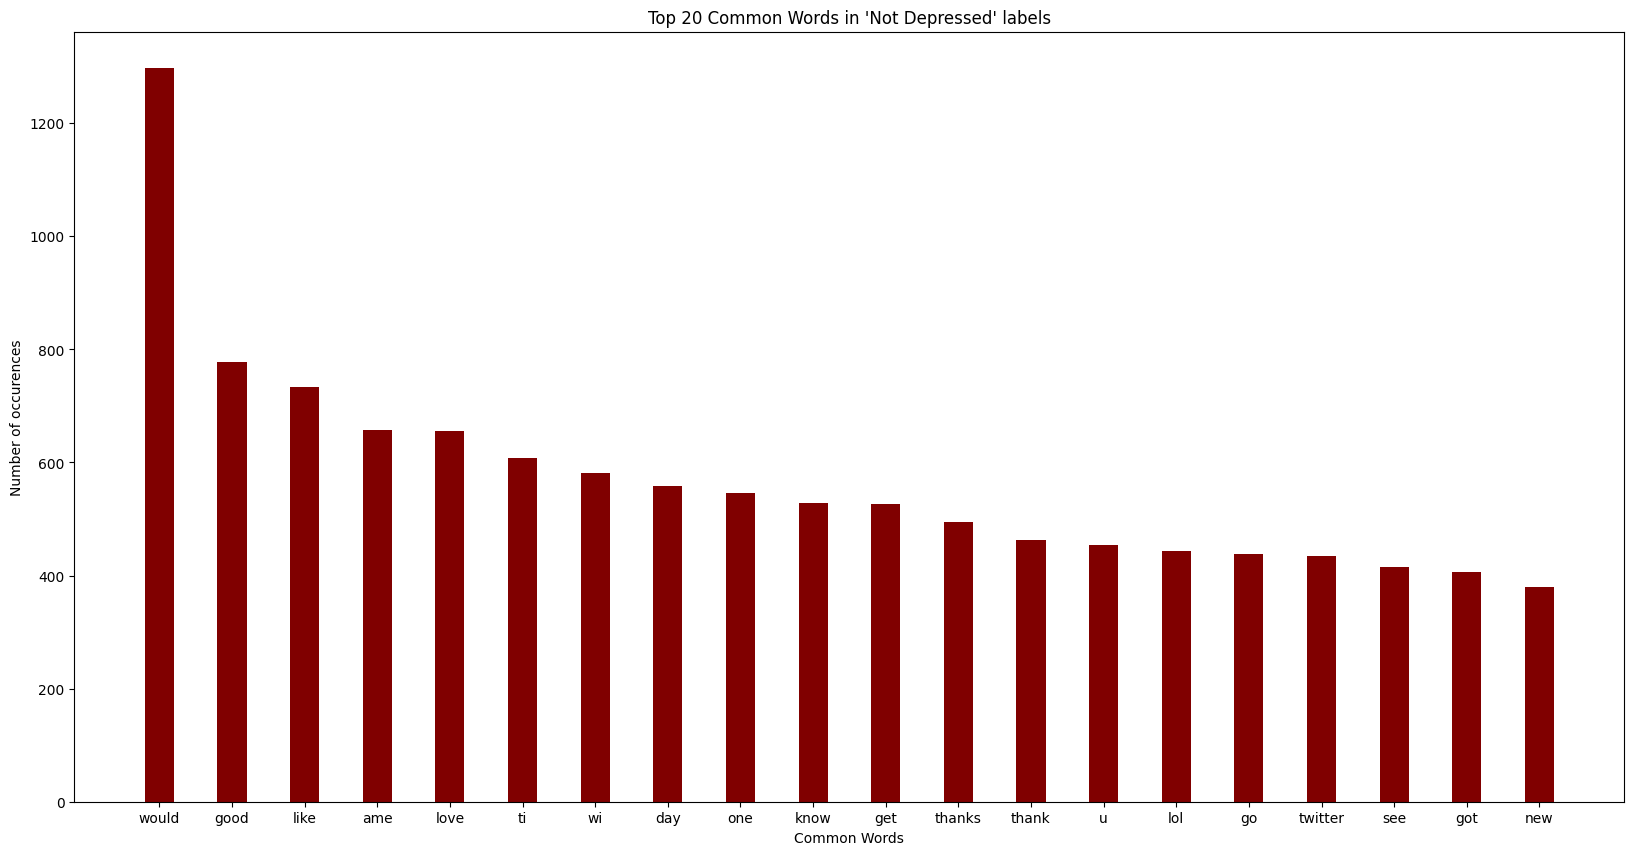

In [92]:
## seems like there's omething werong with this graph - braint not functiomning well now 
## UPDATE: all okie noww
## Visualise in Bar Graph (Popular Words in NON depressed label)
import matplotlib.pyplot as plt

nondepressed_words_df = popular_words(df_uncleaned_nondepressed['Message'])

nondepressed_words_df

common_words_list = []
count_list = []

for index, row in nondepressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Not Depressed' labels")
plt.show()


**Insights**: Looking at the common words in the non depressed label tweets, we are able to see words like "would" and "like" which appears in both depressed and non depressed label tweets. We need to filter any other words that may exist in both labels to ensure that we can extract the unique common words of the depressed label tweets.

> Getting the most common unique words for depressed labelled tweets (top words that only appears in depressed labelled tweets)

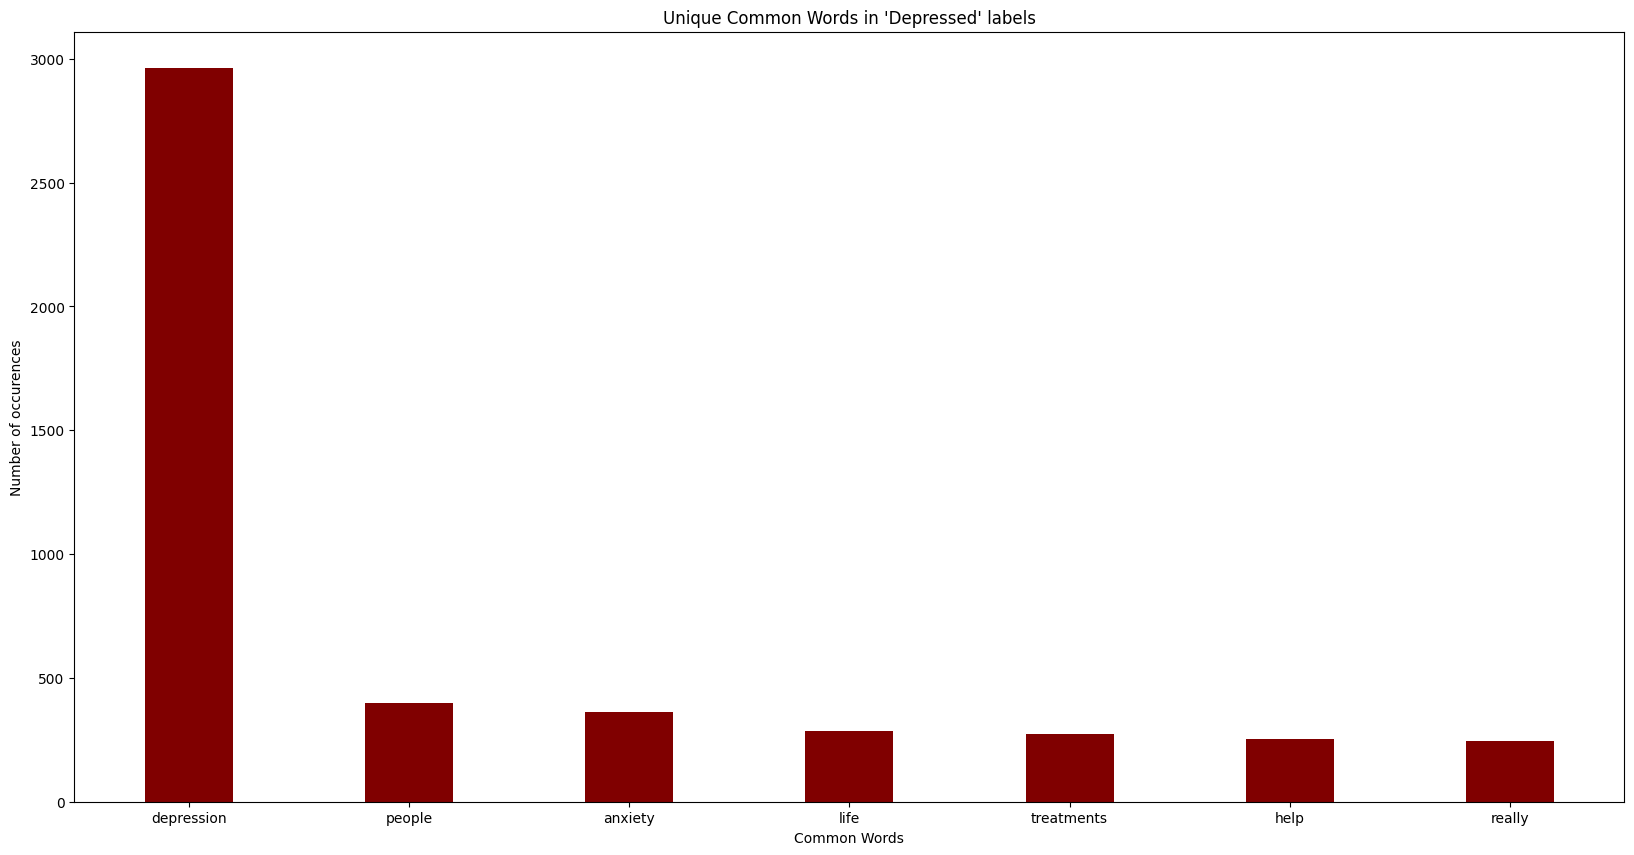

In [93]:
#Find common words in depressed labels that do not appear in non depressed labels

# Depressed dataframe
depressed_words_df

depressed_words = []
depressed_count = []

for index, row in depressed_words_df.iterrows():
    depressed_words.append(row['Common_words'])
    depressed_count.append(row['count'])

# Non Depressed dataframe
nondepressed_words_df

nondepressed_words = []
nondepressed_count = []

for index, row in nondepressed_words_df.iterrows():
    nondepressed_words.append(row['Common_words'])
    nondepressed_count.append(row['count'])


unique_depressed_words = []
unique_depressed_count = []

for i in range(len(depressed_words)):
    if depressed_words[i] not in nondepressed_words:
        unique_depressed_words.append(depressed_words[i])
        unique_depressed_count.append(depressed_count[i])

        
# Plot Bar Graph
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(unique_depressed_words, unique_depressed_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Unique Common Words in 'Depressed' labels")
plt.show()

**Insights**: After obtaining the unique words for the depressed label tweets, we are able to identify 8 unique words that only exist in the depressed labelled tweets.

In [94]:
df_uncleaned.head()

Message  Label                                                                                                  Tokenised
0                                                       real good moment miss hi much      0                                                               [real, good, moment, missssssssss, hi, much]
1                                                                       reading manga      0                                                                                           [reading, manga]
2                                                                                          0                                                                                                         []
3  need send em accountant tomorrow oddly even refer tax support evi wouldence though      0  [need, send, em, accountant, tomorrow, oddly, even, referring, taxes, supporting, evi, wouldence, though]
4                                                   add myspace myspacecomlookthunder      0                                                                      [add, myspace, myspacecomlookthunder]

In [95]:
df_cleaned = df_uncleaned[["Message","Label"]]

In [96]:
df_cleaned.reset_index(inplace=True)

In [97]:
df_cleaned.head()

index                                                                             Message  Label
0      0                                                       real good moment miss hi much      0
1      1                                                                       reading manga      0
2      2                                                                                          0
3      3  need send em accountant tomorrow oddly even refer tax support evi wouldence though      0
4      4                                                   add myspace myspacecomlookthunder      0

In [98]:
df_cleaned.shape

(26609, 3)

In [99]:
list_of_index = df_cleaned[df_cleaned['Message'] == ''].index.values.tolist()
print(list_of_index)
print(f'number of row with empty string: {len(list_of_index)}')

[2, 156, 263, 526, 718, 778, 809, 1233, 1461, 1480, 2053, 2708, 2800, 2948, 3394, 3477, 3506, 3779, 3821, 3960, 4153, 4289, 4294, 4478, 4773, 4837, 5005, 5201, 5496, 5511, 5677, 6413, 6432, 6529, 6570, 7279, 7471, 7707, 9034, 9583, 9606, 9704, 9718, 10197, 10313, 10378, 10404, 10428, 10480, 10524, 10641, 10652, 10665, 10740, 10775, 10806, 11015, 11045, 11082, 11104, 11122, 11126, 11167, 11247, 12929, 12957, 12980, 13054, 13102, 13103, 13195, 13233, 13591, 13596, 13611, 13699, 13707, 13715, 13808, 13821, 13917, 13972, 13993, 14026, 14044, 14066, 14155, 14365, 14541, 15106, 15267, 15324, 15327, 15331, 16112, 16170, 16218, 16454, 16522, 16549, 16584, 16592, 16607, 16633, 16653, 16682, 16686, 16694, 16733, 16797, 17097, 17322, 17383, 17725, 18411, 18474, 18599, 19114, 19116, 19319, 19324, 19558, 19567, 19722, 19829, 21730, 21868, 21925, 22011, 22391, 22530, 22566, 22639, 22774, 22947, 23161, 23305, 23412, 23489, 23518, 23609, 23610, 23677, 24068, 24123, 24365, 24625]
number of row with emp

In [100]:
df_cleaned.iloc[list_of_index]

index Message  Label
2          2              0
156      156              0
263      263              0
526      526              0
718      718              0
778      778              0
809      809              0
1233    1233              0
1461    1461              0
1480    1480              0
2053    2053              0
2708    2708              0
2800    2800              0
2948    2948              0
3394    3394              0
3477    3477              0
3506    3506              0
3779    3779              0
3821    3821              0
3960    3960              0
4153    4153              0
4289    4289              0
4294    4294              0
4478    4478              0
4773    4773              0
4837    4837              0
5005    5005              0
5201    5201              0
5496    5496              0
5511    5511              0
5677    5677              0
6413    6413              0
6432    6432              0
6529    6529              0
6570    6570              0
7279    7279              0
7471    7471              0
7707    7707              0
9034    9034              1
9583    9583              1
9606    9606              1
9704    9704              1
9718    9718              1
10197  10197              1
10313  10313              1
10378     81              1
10404    110              1
10428    138              1
10480    210              1
10524    261              1
10641    378              1
10652    389              1
10665    402              1
10740    477              1
10775    512              1
10806    543              1
11015    752              1
11045    782              1
11082    819              1
11104    841              1
11122    859              1
11126    863              1
11167    905              1
11247    991              1
12929   2760              1
12957   2816              1
12980   2962              1
13054   3329              1
13102   3466              1
13103   3467              1
13195   3616              1
13233   3664              1
13591   4083              1
13596   4088              1
13611   4104              1
13699   4194              1
13707   4202              1
13715   4211              1
13808   4305              1
13821   4318              1
13917   4417              1
13972   4473              1
13993   4494              1
14026   4528              1
14044   4546              1
14066   4569              1
14155   4659              1
14365   4950              1
14541   5129              1
15106   5857              1
15267   6053              1
15324   6300              1
15327   6303              1
15331   6307              1
16112   7252              1
16170   7328              1
16218   7390              1
16454   7644              1
16522   7716              1
16549   7747              1
16584   7798              1
16592   7807              1
16607   7827              1
16633   7854              1
16653   7875              1
16682   7904              1
16686   7908              1
16694   7916              1
16733   7983              1
16797   8092              1
17097   8430              1
17322   8664              1
17383   8725              1
17725   9071              1
18411   9903              1
18474   9970              1
18599  10132              0
19114  11022              0
19116  11024              0
19319  11346              0
19324  11359              0
19558  11722              0
19567  11734              0
19722  11910              0
19829  12025              0
21730  14178              0
21868  14523              0
21925  14636              0
22011  14743              0
22391  15196              0
22530  15381              0
22566  15426              0
22639  15509              0
22774  15671              0
22947  15879              0
23161  16125              0
23305  16291              0
23412  16447              0
23489  16551              0
23518  16584              0
23609  16699              0
23610  16701              0
236

##### Drop row with empty string

In [101]:
df_cleaned.drop(index=list_of_index, inplace = True)

/var/folders/d3/582wc_hj1gd1q0s57sqgv_s80000gn/T/ipykernel_2163/826541498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(index=list_of_index, inplace = True)


In [102]:
df_cleaned.shape

(26462, 3)

### Splitting Training and Testing

In [103]:
x = df_cleaned.Message
y = df_cleaned.Label

# print(x)
print(y)

0        0
1        0
3        0
4        0
5        0
        ..
26604    0
26605    0
26606    0
26607    0
26608    0
Name: Label, Length: 26462, dtype: int64


In [104]:
x.values

array(['real good moment miss hi much', 'reading manga',
       'need send em accountant tomorrow oddly even refer tax support evi wouldence though',
       ...,
       'flow chart thoroughly oversold piece program documentation frederick brook jr mythical man month',
       'ship safe harbor never mean stay',
       'black hole god divi woulding zero'], dtype=object)

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### convert text to vectors

In [106]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [107]:
print(type(xv_test))

<class 'scipy.sparse._csr.csr_matrix'>


<hr>

## Baseline Model

In [108]:
#model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score



In [109]:
baseline_models = []
baseline_models.append(('Logistic Regression', LogisticRegression(random_state=0)))
baseline_models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=0)))
baseline_models.append(('Random Forest', RandomForestClassifier(random_state=0)))
baseline_models.append(("Gradientboost", GradientBoostingClassifier(random_state=345)))
baseline_models.append(('SVM', SVC()))
baseline_models.append(('Multinomial NB', MultinomialNB()))

In [110]:
# set table to table to populate with performance results
col = ['BASELINE_MODEL','TRAIN_ACCURACY_MEAN','TEST_ACCURACY', 'PRECISION', 'RECALL','F1 SCORE']

def runbaselinemodel(Xtrain, ytrain):
    train_acc_results = []
    test_acc_results = []
    #names = []
    
    df_results = pd.DataFrame(columns=col)
    
    i = 0
    # evaluate each model using cross-validation
    for name, model in baseline_models:
        kfold = KFold(n_splits=2)  # 10-fold cross-validation

        # cv accuracy scoring
        cv_acc_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
        train_acc_results.append(cv_acc_results)

        #test accuracy scoring
        model.fit(Xtrain,ytrain)
                
        pred = model.predict(xv_test)
        test_accuracy = accuracy_score(y_test, pred)
        test_acc_results.append(test_accuracy)
        
        #Confusion Matrix
        cm = confusion_matrix(pred,y_test)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = (2*precision*recall)/(precision + recall)

        #names.append(name)
        df_results.loc[i] = [name, round(cv_acc_results.mean()*100, 2), round(test_accuracy*100,2), round(precision*100,2), round(recall*100,2), round(f1*100,2)]

        i += 1
        
    return df_results

In [111]:
baseline_result = runbaselinemodel(xv_train, y_train)

KeyboardInterrupt: 

In [ ]:
baseline_result.sort_values(by=['TEST_ACCURACY', 'F1 SCORE'], ascending=False)

### GPT Language Model 

GPT-3 is still relatively new and expensive to use. GPT-2, on the other hand, is a well-established language model that has been extensively used in research and industry. It has a lower number of parameters compared to GPT-3, but is still capable of generating high-quality text and can be fine-tuned for a variety of NLP tasks.

In [112]:
import pandas as pd
import torch
from torch.nn.utils.rnn import pad_sequence
from transformers import GPT2Tokenizer, GPT2LMHeadModel

In [113]:
df_cleaned
x_train, x_test, y_train, y_test = train_test_split(df_cleaned["Message"], df_cleaned["Label"], test_size=0.25)


In [125]:
# vectorization = TfidfVectorizer()
# xv_train = vectorization.fit_transform(x_train)
# xv_test = vectorization.transform(x_test)

# Initialize GPT-2 tokenizer and model
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Tokenize training data and encode into input IDs
# Explanation: Breaking down each Text Documents in the dataset into a sequence of Tokens that represents the words 
# and other meaningful units Integer ID, which is used to reprsent the token in a numerical format. 

# Embedding: the process of representing each token in the text data  as a numerical vector, or embedding that captures
# its meaning and context. In the code provided. 

train_input_ids = []
for text in x_train:
    input_ids = tokenizer.encode(text, return_tensors="pt")
    train_input_ids.append(input_ids)

# Generate GPT-2 embeddings for training data
with torch.no_grad():
    train_embeddings = []
    for input_ids in train_input_ids:
        embeddings = model.transformer.wte(input_ids)
        embeddings = embeddings.flatten().numpy()  # Flatten the embeddings
        train_embeddings.append(torch.tensor(embeddings))  # Convert to PyTorch tensor
    train_embeddings_output = pad_sequence(train_embeddings, batch_first=True, padding_value=0)

    
# Tokenize testing data and encode into input IDs
test_input_ids = []
for text in x_test:
    input_ids = tokenizer.encode(text, return_tensors="pt")
    test_input_ids.append(input_ids)

# Generate GPT-2 embeddings for testing data
with torch.no_grad():
    test_embeddings = []
    for input_ids in test_input_ids:
        embeddings = model.transformer.wte(input_ids)
        embeddings = embeddings.flatten().numpy()  # Flatten the embeddings
        test_embeddings.append(torch.tensor(embeddings))  # Convert to PyTorch tensor
        
#     test_features = [embedding.flatten().numpy() for embedding in test_embeddings]
    test_embeddings_output = pad_sequence(test_embeddings, batch_first=True, padding_value=0,total_length=80640)


TypeError: pad_sequence() got an unexpected keyword argument 'total_length'

In [122]:
train_embeddings_output.shape

torch.Size([19846, 80640])

In [ ]:
test_embeddings_output.shape

In [119]:
y_train.shape

(19846,)

In [120]:
y_test.shape

(6616,)

In [ ]:
for x in train_embeddings_output:
    print(type(x))
    print(x)
    break
    
for x in test_embeddings_output:
#     print(type(x))
    print(len(x))


In [ ]:
x_train.head()

In [ ]:
col = ['BASELINE_MODEL','TRAIN_ACCURACY_MEAN','TEST_ACCURACY', 'PRECISION', 'RECALL','F1 SCORE']

def runbaselinemodel(X_train, y_train, X_test, y_test):
    train_acc_results = []
    test_acc_results = []
    
    df_results = pd.DataFrame(columns=col)
    
    i = 0
    for name, model in baseline_models:
        kfold = KFold(n_splits=2)

        cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
        train_acc_results.append(cv_acc_results)

        model.fit(X_train,y_train)
                
        pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, pred)
        test_acc_results.append(test_accuracy)
        
        cm = confusion_matrix(pred,y_test)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = (2*precision*recall)/(precision + recall)

        df_results.loc[i] = [name, round(cv_acc_results.mean()*100, 2), round(test_accuracy*100,2), round(precision*100,2), round(recall*100,2), round(f1*100,2)]

        i += 1
        
    return df_results

baseline_model_GPT = runbaselinemodel(train_embeddings_output, y_train, test_embeddings_output,y_test)


In [ ]:
# for element in train_features:
#     print(len(element))
    

<hr>

## Deep Learning Model

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU,SimpleRNN, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.layers import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

https://coderzcolumn.com/tutorials/artificial-intelligence/keras-glove-embeddings-for-text-classification

### Load GloVe Word Embeddings in Memory

download glove - https://nlp.stanford.edu/projects/glove/

In this section, we are simply loading Glove embeddings in memory from the file. We have created a simple dictionary whose keys are tokens (words) and values are embeddings.

In [ ]:
import numpy as np

glove_embeddings = {}
with open("./glove.twitter.27B/glove.twitter.27B.200d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        try:
            line = line.split()
            glove_embeddings[line[0]] = np.array(line[1:], dtype=np.float32)
        except:
            continue

In [ ]:
embeddings = glove_embeddings["the"]

embeddings.shape, embeddings.dtype

### Word Embedding

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

Word embedding methods learn a real-valued vector representation for a predefined fixed sized vocabulary from a corpus of text.

In [ ]:
'''
First, we have created an instance of Tokenizer and called fit_on_texts() method on it. We have provided the method train and test examples.
A call to this method will internally populate a vocabulary of all unique tokens in the tokenizer object.

Next, we have called texts_to_sequences() method on Tokenizer object with train and test text examples. 
This method will tokenize each text example into tokens and then retrieve indexes of those tokens from the vocabulary.

Now, each of our text examples is of a different length and hence has a different number of tokens (words). 
We have decided to keep maximum of 50 tokens per text example. To do this, we have called pad_sequences() function on the list 
of token indexes. This method will make sure that each example has exactly 50 token indexes. 
The examples that have more than 50 tokens will be truncated to 50 tokens and those who
have less than 50 tokens will be padded with 0s to bring it to length 50.
'''

maxlen = 100

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(df_cleaned.Message)

## Vectorizing data to keep 50 words per sample.
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen, truncating="post", value=0.)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen, truncating="post", value=0.)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)

In [ ]:
print(X_train[:3])

X_train.shape, X_test.shape

In this section, we have implemented the third step of our encoding process that we had explained earlier. We are simply looping through our vocabulary and retrieving GloVe embeddings for each token. We have then stacked embeddings of all tokens of our vocabulary in one big matrix. The matrix have shape (vocab_len, embed_len). The embedding length in our case is 300 as we had said earlier.

We can now retrieve glove embedding from this matrix by integer indexing it using the token index of that token. To explain it with an example, let's say that the index of 'the' token in our vocabulary is '1' then we can simply index embedding matrix like 'embedding_matrix[1]' to retrieve the embedding of the token 'the'.

In [ ]:
embed_len = 200

word_embeddings = np.zeros((len(tokenizer.index_word)+1, embed_len))

for idx, word in tokenizer.index_word.items():
    word_embeddings[idx] = glove_embeddings.get(word, np.zeros(embed_len))

In [ ]:
word_embeddings[1][:3]

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

##### Define Network

In [ ]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

##### Train Network


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
plot_history(history)

Global max/average pooling takes the maximum/average of all features whereas in the other case you have to define the pool size. Keras has again its own layer that you can add in the sequential model:

#### basline model using embedding layers and simpleRNN

In [ ]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Convolutional Neural Networks (CNN)

Convolutional neural networks or also called convnets are one of the most exciting developments in machine learning in recent years.

They have revolutionized image classification and computer vision by being able to extract features from images and using them in neural networks. The properties that made them useful in image processing makes them also handy for sequence processing. You can imagine a CNN as a specialized neural network that is able to detect specific patterns.

A CNN has hidden layers which are called convolutional layers. When you think of images, a computer has to deal with a two dimensional matrix of numbers and therefore you need some way to detect features in this matrix. These convolutional layers are able to detect edges, corners and other kinds of textures which makes them such a special tool. The convolutional layer consists of multiple filters which are slid across the image and are able to detect specific features.

In [ ]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Bi-Directional LSTM

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)